# Outlines

- [1 - Import Libraries](#1)
- [2 - Load & Explore Data](#2)
- [3- Data Cleaning](#3)
    - [3.1- Missing Data](#3.1)
    - [3.2- Duplicated Data](#3.2)
    - [3.3- Outliers](#3.3)
- [4- Data Visualization & EDA](#4)
- [5- Preprocessing](#5)
    - [5.1- Numerical Columns](#5.1)
    - [5.2- Categorical Columns](#5.2)
    - [5.3- Feature Importance](#5.3)
- [6- Modeling](#6)
    - [6.1- Models Evaluation](#6.1)
- [7- Hyperparameter Tuning](#7)
    - [7.1- Final Model](#7.1)
- [8- Test Data](#8)

<a name="1"></a>
# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<a name="2"></a>
# Loading & Exploring Data

In [2]:
train_data = pd.read_csv("/kaggle/input/my-dataset/credit_train.csv")
train_data

Loan ID  \
0       14dd8831-6af5-400b-83ec-68e61888a048   
1       4771cc26-131a-45db-b5aa-537ea4ba5342   
2       4eed4e6a-aa2f-4c91-8651-ce984ee8fb26   
3       77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a   
4       d4062e70-befa-4995-8643-a0de73938182   
...                                      ...   
100509                                   NaN   
100510                                   NaN   
100511                                   NaN   
100512                                   NaN   
100513                                   NaN   

                                 Customer ID Loan Status  Current Loan Amount  \
0       981165ec-3274-42f5-a3b4-d104041a9ca9  Fully Paid             445412.0   
1       2de017a3-2e01-49cb-a581-08169e83be29  Fully Paid             262328.0   
2       5efb2b2b-bf11-4dfd-a572-3761a2694725  Fully Paid           99999999.0   
3       e777faab-98ae-45af-9a86-7ce5b33b1011  Fully Paid             347666.0   
4       81536ad9-5ccf-4eb8-befb-47a4d608658e  Fully Paid             176220.0   
...                                      ...         ...                  ...   
100509                                   NaN         NaN                  NaN   
100510                                   NaN         NaN                  NaN   
100511                                   NaN         NaN                  NaN   
100512                                   NaN         NaN                  NaN   
100513                                   NaN         NaN                  NaN   

              Term  Credit Score  Annual Income Years in current job  \
0       Short Term         709.0      1167493.0              8 years   
1       Short Term           NaN            NaN            10+ years   
2       Short Term         741.0      2231892.0              8 years   
3        Long Term         721.0       806949.0              3 years   
4       Short Term           NaN            NaN              5 years   
...            ...           ...            ...                  ...   
100509         NaN           NaN            NaN                  NaN   
100510         NaN           NaN            NaN                  NaN   
100511         NaN           NaN            NaN                  NaN   
100512         NaN           NaN            NaN                  NaN   
100513         NaN           NaN            NaN                  NaN   

       Home Ownership             Purpose  Monthly Debt  \
0       Home Mortgage   Home Improvements       5214.74   
1       Home Mortgage  Debt Consolidation      33295.98   
2            Own Home  Debt Consolidation      29200.53   
3            Own Home  Debt Consolidation       8741.90   
4                Rent  Debt Consolidation      20639.70   
...               ...                 ...           ...   
100509            NaN                 NaN           NaN   
100510            NaN                 NaN           NaN   
100511            NaN                 NaN           NaN   
100512            NaN                 NaN           NaN   
100513            NaN                 NaN           NaN   

        Years of Credit History  Months since last delinquent  \
0                          17.2                           NaN   
1                          21.1                           8.0   
2                          14.9                          29.0   
3                          12.0                           NaN   
4                           6.1                           NaN   
...                         ...                           ...   
100509                      NaN                           NaN   
100510                      NaN                           NaN   
100511                      NaN                           NaN   
100512                      NaN                           NaN   
100513                      NaN                           NaN   

        Number of Open Accounts  Number of Credit Problems  \
0                           6.0                        1.0   
1       

In [3]:
train_data.tail(515)

Loan ID  \
99999   c63916c6-6d46-47a9-949a-51d09af4414f   
100000                                   NaN   
100001                                   NaN   
100002                                   NaN   
100003                                   NaN   
...                                      ...   
100509                                   NaN   
100510                                   NaN   
100511                                   NaN   
100512                                   NaN   
100513                                   NaN   

                                 Customer ID Loan Status  Current Loan Amount  \
99999   1b3014be-5c07-4d41-abe7-44573c375886  Fully Paid           99999999.0   
100000                                   NaN         NaN                  NaN   
100001                                   NaN         NaN                  NaN   
100002                                   NaN         NaN                  NaN   
100003                                   NaN         NaN                  NaN   
...                                      ...         ...                  ...   
100509                                   NaN         NaN                  NaN   
100510                                   NaN         NaN                  NaN   
100511                                   NaN         NaN                  NaN   
100512                                   NaN         NaN                  NaN   
100513                                   NaN         NaN                  NaN   

              Term  Credit Score  Annual Income Years in current job  \
99999   Short Term         743.0       935180.0                  NaN   
100000         NaN           NaN            NaN                  NaN   
100001         NaN           NaN            NaN                  NaN   
100002         NaN           NaN            NaN                  NaN   
100003         NaN           NaN            NaN                  NaN   
...            ...           ...            ...                  ...   
100509         NaN           NaN            NaN                  NaN   
100510         NaN           NaN            NaN                  NaN   
100511         NaN           NaN            NaN                  NaN   
100512         NaN           NaN            NaN                  NaN   
100513         NaN           NaN            NaN                  NaN   

       Home Ownership             Purpose  Monthly Debt  \
99999        Own Home  Debt Consolidation        9118.1   
100000            NaN                 NaN           NaN   
100001            NaN                 NaN           NaN   
100002            NaN                 NaN           NaN   
100003            NaN                 NaN           NaN   
...               ...                 ...           ...   
100509            NaN                 NaN           NaN   
100510            NaN                 NaN           NaN   
100511            NaN                 NaN           NaN   
100512            NaN                 NaN           NaN   
100513            NaN                 NaN           NaN   

        Years of Credit History  Months since last delinquent  \
99999                      13.0                           NaN   
100000                      NaN                           NaN   
100001                      NaN                           NaN   
100002                      NaN                           NaN   
100003                      NaN                           NaN   
...                         ...                           ...   
100509                      NaN                           NaN   
100510                      NaN                           NaN   
100511                      NaN                           NaN   
100512                      NaN                           NaN   
100513                      NaN                           NaN   

        Number of Open Accounts  Number of Credit Problems  \
99999                       4.0                        1.0   
100000  

In [4]:
last_nan = train_data.iloc[100000:]
last_nan.isna().sum()

Loan ID                         514
Customer ID                     514
Loan Status                     514
Current Loan Amount             514
Term                            514
Credit Score                    514
Annual Income                   514
Years in current job            514
Home Ownership                  514
Purpose                         514
Monthly Debt                    514
Years of Credit History         514
Months since last delinquent    514
Number of Open Accounts         514
Number of Credit Problems       514
Current Credit Balance          514
Maximum Open Credit             514
Bankruptcies                    514
Tax Liens                       514
dtype: int64

- **Comments**:
    - The Last 514 rows are Missing Values, so we can drop them

In [5]:
train_data = train_data.iloc[:10000]
train_data

Loan ID  \
0     14dd8831-6af5-400b-83ec-68e61888a048   
1     4771cc26-131a-45db-b5aa-537ea4ba5342   
2     4eed4e6a-aa2f-4c91-8651-ce984ee8fb26   
3     77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a   
4     d4062e70-befa-4995-8643-a0de73938182   
...                                    ...   
9995  084f0ba2-204c-4b43-a131-5a72142e513c   
9996  86c20a91-92d1-4dcd-bf73-9f1392b77519   
9997  c062a82a-cf71-425b-a152-f38bdaccc408   
9998  7a36b0f6-1c19-4984-87d7-d4db3e6ea260   
9999  75474c44-14f5-443d-89cf-859ff4cee994   

                               Customer ID  Loan Status  Current Loan Amount  \
0     981165ec-3274-42f5-a3b4-d104041a9ca9   Fully Paid             445412.0   
1     2de017a3-2e01-49cb-a581-08169e83be29   Fully Paid             262328.0   
2     5efb2b2b-bf11-4dfd-a572-3761a2694725   Fully Paid           99999999.0   
3     e777faab-98ae-45af-9a86-7ce5b33b1011   Fully Paid             347666.0   
4     81536ad9-5ccf-4eb8-befb-47a4d608658e   Fully Paid             176220.0   
...                                    ...          ...                  ...   
9995  1c96581f-1e05-40ca-997a-7bb62b16b6be  Charged Off             143594.0   
9996  7bf1820e-7de2-4e5b-a259-57cfa20d070c   Fully Paid             400158.0   
9997  7a93d940-5c07-4c5c-9774-62be30aa9e54   Fully Paid             154462.0   
9998  ca417f48-23e0-447a-b0e2-13e0c4f42f26   Fully Paid             264484.0   
9999  92d31313-6bbc-40c3-be3c-a5d2cd44a1ed   Fully Paid             161304.0   

            Term  Credit Score  Annual Income Years in current job  \
0     Short Term         709.0      1167493.0              8 years   
1     Short Term           NaN            NaN            10+ years   
2     Short Term         741.0      2231892.0              8 years   
3      Long Term         721.0       806949.0              3 years   
4     Short Term           NaN            NaN              5 years   
...          ...           ...            ...                  ...   
9995  Short Term         736.0      1024917.0              4 years   
9996   Long Term           NaN            NaN             < 1 year   
9997  Short Term         751.0       833796.0              9 years   
9998  Short Term         733.0      1427565.0              2 years   
9999  Short Term         743.0       551456.0              4 years   

     Home Ownership             Purpose  Monthly Debt  \
0     Home Mortgage   Home Improvements       5214.74   
1     Home Mortgage  Debt Consolidation      33295.98   
2          Own Home  Debt Consolidation      29200.53   
3          Own Home  Debt Consolidation       8741.90   
4              Rent  Debt Consolidation      20639.70   
...             ...                 ...           ...   
9995  Home Mortgage               other      12982.13   
9996           Rent  Debt Consolidation       7084.53   
9997  Home Mortgage               other      10630.88   
9998           Rent  Debt Consolidation      28313.42   
9999       Own Home               Other      15165.23   

      Years of Credit History  Months since last delinquent  \
0                        17.2                           NaN   
1                        21.1                           8.0   
2                        14.9                          29.0   
3                        12.0                           NaN   
4                         6.1                           NaN   
...                       ...                           ...   
9995                      8.1                          40.0   
9996                     15.5                           NaN   
9997                     17.4                           NaN   
9998                     10.8                           NaN   
9999                     39.4                          17.0   

      Number of Open Accounts  Number of Credit Problems  \
0                         6.0                        1.0   
1                        35.0                        0.0   
2                        18.0                        1.0  

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       10000 non-null  object 
 1   Customer ID                   10000 non-null  object 
 2   Loan Status                   10000 non-null  object 
 3   Current Loan Amount           10000 non-null  float64
 4   Term                          10000 non-null  object 
 5   Credit Score                  8063 non-null   float64
 6   Annual Income                 8063 non-null   float64
 7   Years in current job          9570 non-null   object 
 8   Home Ownership                10000 non-null  object 
 9   Purpose                       10000 non-null  object 
 10  Monthly Debt                  10000 non-null  float64
 11  Years of Credit History       10000 non-null  float64
 12  Months since last delinquent  4702 non-null   float64
 13  Nu

In [7]:
train_data.describe()

Current Loan Amount  Credit Score  Annual Income   Monthly Debt  \
count         1.000000e+04   8063.000000   8.063000e+03   10000.000000   
mean          1.163724e+07   1105.574724   1.373190e+06   18437.491073   
std           3.163530e+07   1527.658836   8.587615e+05   12075.207545   
min           2.147200e+04    589.000000   1.112450e+05       0.000000   
25%           1.787390e+05    705.000000   8.453860e+05   10064.395000   
50%           3.117620e+05    724.000000   1.167683e+06   16186.005000   
75%           5.246890e+05    741.000000   1.640792e+06   24066.872500   
max           1.000000e+08   7510.000000   9.458200e+06  120559.560000   

       Years of Credit History  Months since last delinquent  \
count             10000.000000                   4702.000000   
mean                 18.236260                     35.438749   
std                   6.954448                     22.127004   
min                   3.600000                      0.000000   
25%                  13.600000                     17.000000   
50%                  17.000000                     32.000000   
75%                  21.700000                     52.000000   
max                  53.200000                    152.000000   

       Number of Open Accounts  Number of Credit Problems  \
count             10000.000000               10000.000000   
mean                 11.095100                   0.172500   
std                   4.995914                   0.485147   
min                   1.000000                   0.000000   
25%                   8.000000                   0.000000   
50%                  10.000000                   0.000000   
75%                  14.000000                   0.000000   
max                  48.000000                   7.000000   

       Current Credit Balance  Maximum Open Credit  Bankruptcies    Tax Liens  
count            1.000000e+04         1.000000e+04   9983.000000  9999.000000  
mean             2.934239e+05         8.388867e+05      0.120906     0.030403  
std              3.491785e+05         8.533291e+06      0.355153     0.246755  
min              0.000000e+00         0.000000e+00      0.000000     0.000000  
25%              1.113305e+05         2.697475e+05      0.000000     0.000000  
50%              2.092755e+05         4.638480e+05      0.000000     0.000000  
75%              3.696260e+05         7.846960e+05      0.000000     0.000000  
max              7.423870e+06         6.324777e+08      5.000000     6.000000

In [8]:
train_data.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [9]:
train_data.nunique()

Loan ID                         9828
Customer ID                     9828
Loan Status                        2
Current Loan Amount             6763
Term                               2
Credit Score                     281
Annual Income                   7130
Years in current job              11
Home Ownership                     4
Purpose                           15
Monthly Debt                    9579
Years of Credit History          423
Months since last delinquent      91
Number of Open Accounts           44
Number of Credit Problems          8
Current Credit Balance          8347
Maximum Open Credit             8905
Bankruptcies                       6
Tax Liens                          7
dtype: int64

In [10]:
for col in train_data.columns[2:]:
    if train_data[col].nunique() < 16:
        print(col + ": "+ str(train_data[col].unique()))
        print("-------------------------------------------------------------")

Loan Status: ['Fully Paid' 'Charged Off']
-------------------------------------------------------------
Term: ['Short Term' 'Long Term']
-------------------------------------------------------------
Years in current job: ['8 years' '10+ years' '3 years' '5 years' '< 1 year' '2 years' '4 years'
 '9 years' '7 years' '1 year' nan '6 years']
-------------------------------------------------------------
Home Ownership: ['Home Mortgage' 'Own Home' 'Rent' 'HaveMortgage']
-------------------------------------------------------------
Purpose: ['Home Improvements' 'Debt Consolidation' 'Buy House' 'other'
 'Business Loan' 'Buy a Car' 'major_purchase' 'Take a Trip' 'Other'
 'small_business' 'Medical Bills' 'wedding' 'vacation'
 'Educational Expenses' 'moving']
-------------------------------------------------------------
Number of Credit Problems: [1. 0. 2. 5. 4. 3. 7. 6.]
-------------------------------------------------------------
Bankruptcies: [ 1.  0.  2.  3. nan  5.  4.]
--------------------

In [11]:
for col in train_data.columns[2:]:
    print(str(train_data[col].value_counts()))
    print("-------------------------------------------------------------")

Loan Status
Fully Paid     7693
Charged Off    2307
Name: count, dtype: int64
-------------------------------------------------------------
Current Loan Amount
99999999.0    1136
134288.0         8
215358.0         6
112706.0         6
225126.0         6
              ... 
474540.0         1
199518.0         1
280302.0         1
782782.0         1
161304.0         1
Name: count, Length: 6763, dtype: int64
-------------------------------------------------------------
Term
Short Term    7181
Long Term     2819
Name: count, dtype: int64
-------------------------------------------------------------
Credit Score
747.0     192
745.0     182
740.0     178
741.0     170
739.0     169
         ... 
6080.0      1
6200.0      1
6570.0      1
6110.0      1
6250.0      1
Name: count, Length: 281, dtype: int64
-------------------------------------------------------------
Annual Income
1130196.0    5
1243284.0    5
1138518.0    5
940120.0     5
1791529.0    4
            ..
1536720.0    1
1681443.0  

In [12]:
train_data.duplicated().sum()

99

In [13]:
train_data.isna().sum()

Loan ID                            0
Customer ID                        0
Loan Status                        0
Current Loan Amount                0
Term                               0
Credit Score                    1937
Annual Income                   1937
Years in current job             430
Home Ownership                     0
Purpose                            0
Monthly Debt                       0
Years of Credit History            0
Months since last delinquent    5298
Number of Open Accounts            0
Number of Credit Problems          0
Current Credit Balance             0
Maximum Open Credit                0
Bankruptcies                      17
Tax Liens                          1
dtype: int64

- **Comments**:
    - we have 19 columns and 10k rows with 7 Categorical columns and 12 Numerical ones.
    - we have 99 duplicated value, so we can drop them
    - we don't need `Loan ID` and `Customer ID` ,so we can drop them
    - we have most missing values in `Months since last delinquent` Column with about 5k, so we can drop it
        - After that, `Credit Score` and ` Annual Income` Columns with about 2k and it seems their null values are same 
    - Replace `other` to `Other` in `Purpose` Column
    - Replace `HaveMortgage` to `Home Mortgage` in `Home Ownership` Column with 3 categories
    - Combine `Purpose` categories into only 4 ones
    - Combine `Years in current job` categories into 5 ones

<a name="3"></a>
# Data Cleaning

In [14]:
train_data = train_data.drop(columns=["Loan ID", "Customer ID"])

In [15]:
train_data["Purpose"] = train_data["Purpose"].replace({"other":"Other", "moving":"Personal",
                                                       "Educational Expenses":"Personal", "wedding":"Personal",
                                                       "Medical Bills":"Personal", "Buy a Car":"Personal",
                                                       "Buy House":"Personal", "Home Improvements":"Personal",
                                                       "Take a Trip": "Personal","vacation":"Personal",
                                                       "major_purchase":"Personal", "small_business":"Personal"})

In [16]:
train_data["Home Ownership"] = train_data["Home Ownership"].replace({"HaveMortgage":"Home Mortgage"})

In [17]:
train_data["Years in current job"] = train_data["Years in current job"].replace({"7 years":"7-9 years",
                                                                                 "8 years":"7-9 years",
                                                                                 "9 years":"7-9 years",
                                                                                 "4 years":"4-6 years",
                                                                                 "5 years":"4-6 years",
                                                                                 "6 years":"4-6 years",
                                                                                 "< 1 year":"0-1 year",
                                                                                 "1 year":"0-1 year",
                                                                                 "2 years":"2-3 years",
                                                                                 "3 years":"2-3 years"})

In [18]:
train_data["Purpose"].unique()

array(['Personal', 'Debt Consolidation', 'Other', 'Business Loan'],
      dtype=object)

In [19]:
train_data["Home Ownership"].unique()

array(['Home Mortgage', 'Own Home', 'Rent'], dtype=object)

In [20]:
train_data["Years in current job"].unique()

array(['7-9 years', '10+ years', '2-3 years', '4-6 years', '0-1 year',
       nan], dtype=object)

<a name="3.1"></a>
## Missing Data

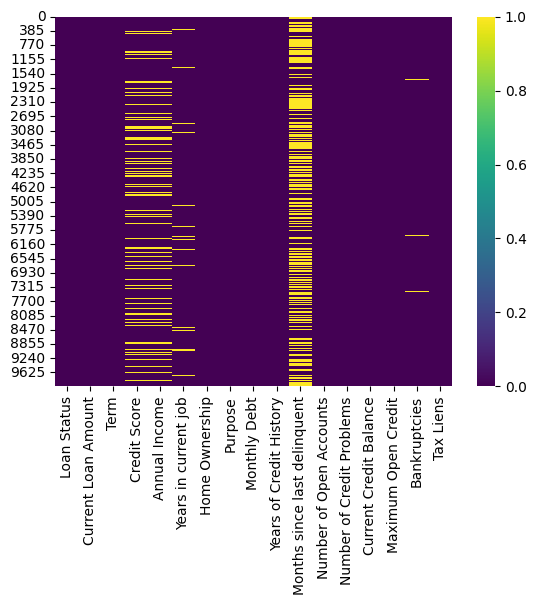

In [21]:
sns.heatmap(train_data.isnull(), cmap='viridis')
plt.show()

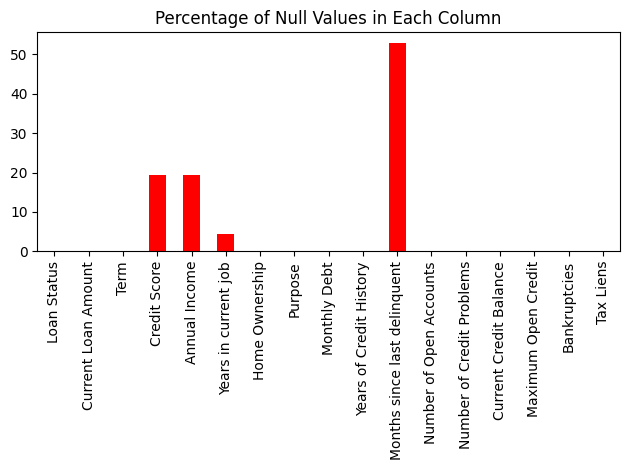

In [22]:
# Calculate the percentage of null values in each column
null_percentages = train_data.isnull().mean(axis=0) * 100

null_percentages.plot(kind='bar', color='red')
plt.title('Percentage of Null Values in Each Column')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- **Comments**:
    - we will drop `Months since last delinquent` as 53% of it is null values
    - we can drop the missing values in `Credit Score` and `Annual Score` Columns as they are not to much, and we can do the same for `Years in current job`

In [23]:
train_data = train_data.drop(columns=["Months since last delinquent"])

In [24]:
train_data = train_data.dropna(subset=["Bankruptcies", "Years in current job", "Credit Score", "Annual Income"])

In [25]:
train_data.isna().sum()

Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

<a name="3.2"></a>
## Duplicated Data

In [26]:
train_data.duplicated().sum()

95

In [27]:
train_data[train_data.duplicated()]

Loan Status  Current Loan Amount        Term  Credit Score  \
420   Fully Paid             152372.0  Short Term         697.0   
1627  Fully Paid             751300.0  Short Term         716.0   
1828  Fully Paid             341352.0   Long Term         712.0   
2216  Fully Paid             340604.0   Long Term         618.0   
2247  Fully Paid              37752.0  Short Term         715.0   
...          ...                  ...         ...           ...   
9739  Fully Paid             244420.0   Long Term         696.0   
9779  Fully Paid             215842.0  Short Term         676.0   
9953  Fully Paid             336116.0   Long Term         712.0   
9957  Fully Paid             429000.0  Short Term         711.0   
9987  Fully Paid             198792.0  Short Term         708.0   

      Annual Income Years in current job Home Ownership             Purpose  \
420        845937.0             0-1 year           Rent  Debt Consolidation   
1627      3614978.0            4-6 years  Home Mortgage  Debt Consolidation   
1828       751108.0             0-1 year  Home Mortgage  Debt Consolidation   
2216       928701.0            10+ years  Home Mortgage  Debt Consolidation   
2247       767372.0            2-3 years           Rent               Other   
...             ...                  ...            ...                 ...   
9739      2461184.0            4-6 years  Home Mortgage            Personal   
9779       768664.0            7-9 years           Rent  Debt Consolidation   
9953      1683590.0            10+ years  Home Mortgage  Debt Consolidation   
9957      1037400.0            10+ years           Rent            Personal   
9987      2289120.0            10+ years  Home Mortgage  Debt Consolidation   

      Monthly Debt  Years of Credit History  Number of Open Accounts  \
420        2876.22                      8.8                     10.0   
1627      72600.71                     11.9                     29.0   
1828      10327.83                     13.3                     11.0   
2216      21205.52                     14.4                      5.0   
2247      11446.74                     14.2                      5.0   
...            ...                      ...                      ...   
9739      31585.22                     27.0                     27.0   
9779      13131.28                     18.1                      9.0   
9953      11925.35                     32.2                     14.0   
9957       8014.01                     11.8                      8.0   
9987      28804.76                     14.0                     15.0   

      Number of Credit Problems  Current Credit Balance  Maximum Open Credit  \
420                         0.0                 56943.0             215468.0   
1627                        0.0                957752.0            2128522.0   
1828                        0.0                 81377.0             110858.0   
2216                        0.0                291137.0             368808.0   
2247                        0.0                   703.0             205480.0   
...                         ...                     ...                  ...   
9739                        0.0                227373.0            2289430.0   
9779                        0.0                 80427.0             173404.0   
9953                        0.0                396226.0             631928.0   
9957                        0.0                101289.0             192896.0   
9987                        0.0                  5149.0              99396.0   

      Bankruptcies  Tax Liens  
420            0.0        0.0  
1627           0.0        0.0  
1828           0.0        0.0  
2216           0.0        0.0  
2247           0.0        0.0  
...            ...        ...  
9739           0.0        0.0  
9779           0.0        0.0  
9953           0.0        0.0  
9957           0.0        0.0  
9987           0.0        0.0  

[95 rows x 16 columns]

In [28]:
train_data = train_data.drop_duplicates()

In [29]:
train_data.duplicated().sum()

0

In [30]:
num_columns=[]
cat_columns=[]
for col in train_data.columns:
    if train_data[col].dtype == "float64":
        num_columns.append(col)
    else:
        cat_columns.append(col)
print("Numerical Columns: ",num_columns)
print("Categorical Columns: ",cat_columns)

Numerical Columns:  ['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts', 'Number of Credit Problems', 'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens']
Categorical Columns:  ['Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose']


<a name="3.3"></a>
## Outliers

No. of IQR outliers in 'Current Loan Amount': 1098
Percentage of outliers in 'Current Loan Amount': 14.42%
-----------------------------------------------------------------
No. of IQR outliers in 'Credit Score': 692
Percentage of outliers in 'Credit Score': 9.09%
-----------------------------------------------------------------
No. of IQR outliers in 'Annual Income': 377
Percentage of outliers in 'Annual Income': 4.95%
-----------------------------------------------------------------
No. of IQR outliers in 'Monthly Debt': 253
Percentage of outliers in 'Monthly Debt': 3.32%
-----------------------------------------------------------------
No. of IQR outliers in 'Years of Credit History': 232
Percentage of outliers in 'Years of Credit History': 3.05%
-----------------------------------------------------------------
No. of IQR outliers in 'Number of Open Accounts': 180
Percentage of outliers in 'Number of Open Accounts': 2.36%
--------------------------------------------------------------

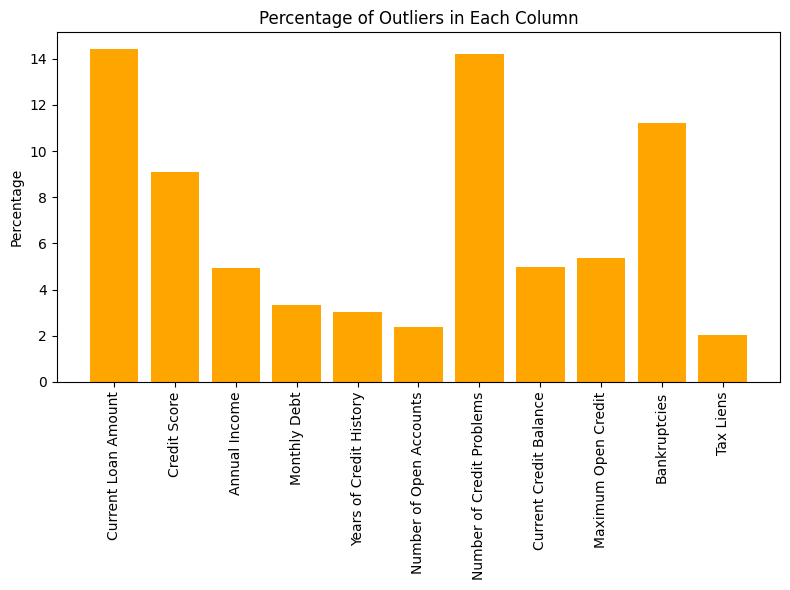

In [31]:
def analyze_visualize_outliers(data, num_columns, plot_type="both"):
    """
    Analyzes and visualizes outliers in numerical columns of a DataFrame.

    Args:
        data (pd.DataFrame): The DataFrame containing the data.
        num_columns (list): A list of numerical column names to analyze.

    Returns:
        dict: A dictionary containing outliers, their counts and percentages for each column.
    """

    outlier_data = {}
    for col in num_columns:
        data_column = data[col]
        Q1 = data_column.quantile(0.25)
        Q3 = data_column.quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = data_column[(data_column < lower_bound) | (data_column > upper_bound)]
        outlier_counts = len(outliers)
        outlier_percentages = (outlier_counts / len(data_column)) * 100

        outlier_data[col] = {
            'count': outlier_counts,
            'percentage': outlier_percentages,
            'outliers': outliers.tolist()
        }

        print(f"No. of IQR outliers in '{col}': {outlier_counts}")
        print(f"Percentage of outliers in '{col}': {outlier_percentages:.2f}%")
        print("-----------------------------------------------------------------")

    # Visualization based on plot_type argument
    if plot_type == "counts":
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.bar(outlier_data.keys(), [v['count'] for v in outlier_data.values()], color='red')
        ax.set_title('Number of Outliers in Each Column')
        ax.set_ylabel('Count')
        ax.set_xticks(list(outlier_data.keys())) 
        ax.set_xticklabels(list(outlier_data.keys()), rotation=90)  
            
        plt.tight_layout()
        plt.show()

    elif plot_type == "percentages":
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.bar(outlier_data.keys(), [v['percentage'] for v in outlier_data.values()], color='orange')
        ax.set_title('Percentage of Outliers in Each Column')
        ax.set_ylabel('Percentage')
        ax.set_xticks(list(outlier_data.keys()))  
        ax.set_xticklabels(list(outlier_data.keys()), rotation=90)  
            
        plt.tight_layout()
        plt.show()

    elif plot_type == "both":
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

        # Plot outlier counts
        ax1.bar(outlier_data.keys(), [v['count'] for v in outlier_data.values()], color='red')
        ax1.set_title('Number of Outliers in Each Column')
        ax1.set_ylabel('Count')
        ax1.set_xticks(list(outlier_data.keys()))  
        ax1.set_xticklabels(list(outlier_data.keys()), rotation=90)  


        # Plot outlier percentages
        ax2.bar(outlier_data.keys(), [v['percentage'] for v in outlier_data.values()], color='orange')
        ax2.set_title('Percentage of Outliers in Each Column')
        ax2.set_ylabel('Percentage')
        ax2.set_xticks(list(outlier_data.keys()))  
        ax2.set_xticklabels(list(outlier_data.keys()), rotation=90)


        plt.tight_layout()
        plt.show()

    else:
        print(f"Invalid plot_type: {plot_type}. Valid options are 'counts', 'percentages', or 'both'.")


    return outlier_data

outlier_results = analyze_visualize_outliers(train_data, num_columns, plot_type="percentages")

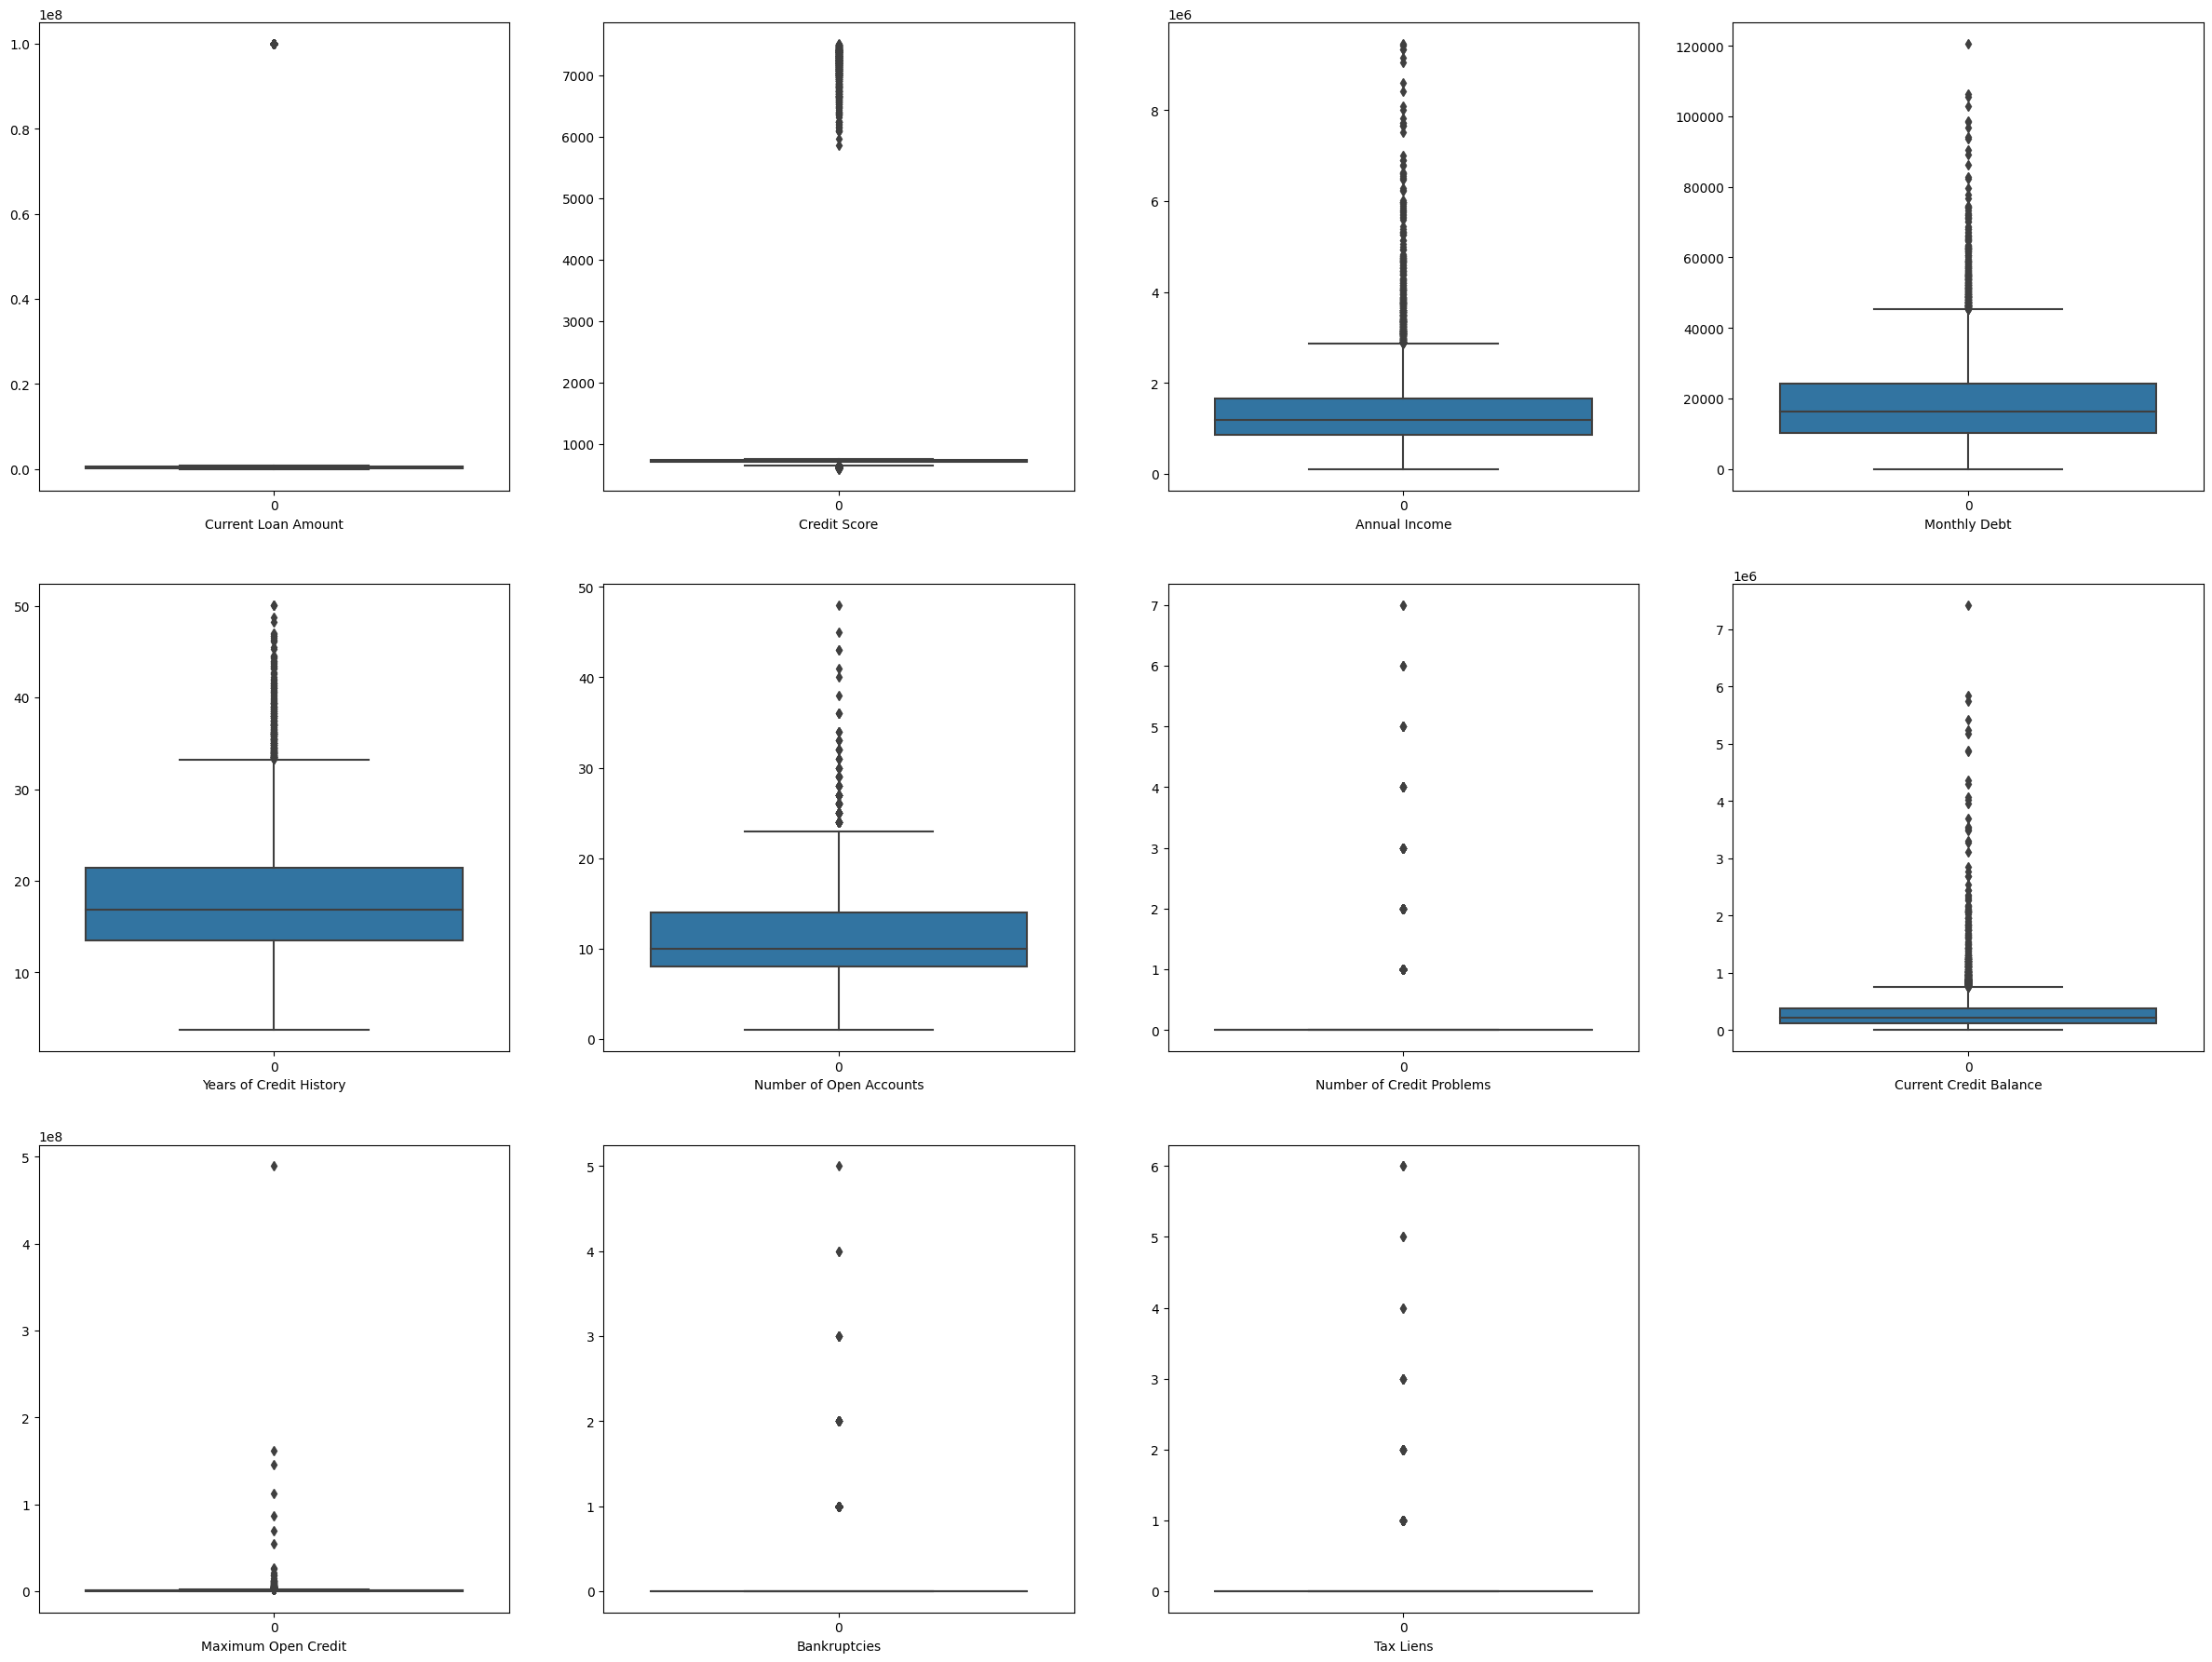

In [32]:
fig = plt.figure(figsize=(30,30))

counter = 0

for col in num_columns:
    sub = fig.add_subplot(4,4,counter+1)
    g = sns.boxplot(data=train_data[col])
    plt.xlabel(col)
    counter = counter + 1

<a name="4"></a>
# Data Visualization (EDA)

<Figure size 2000x1000 with 0 Axes>

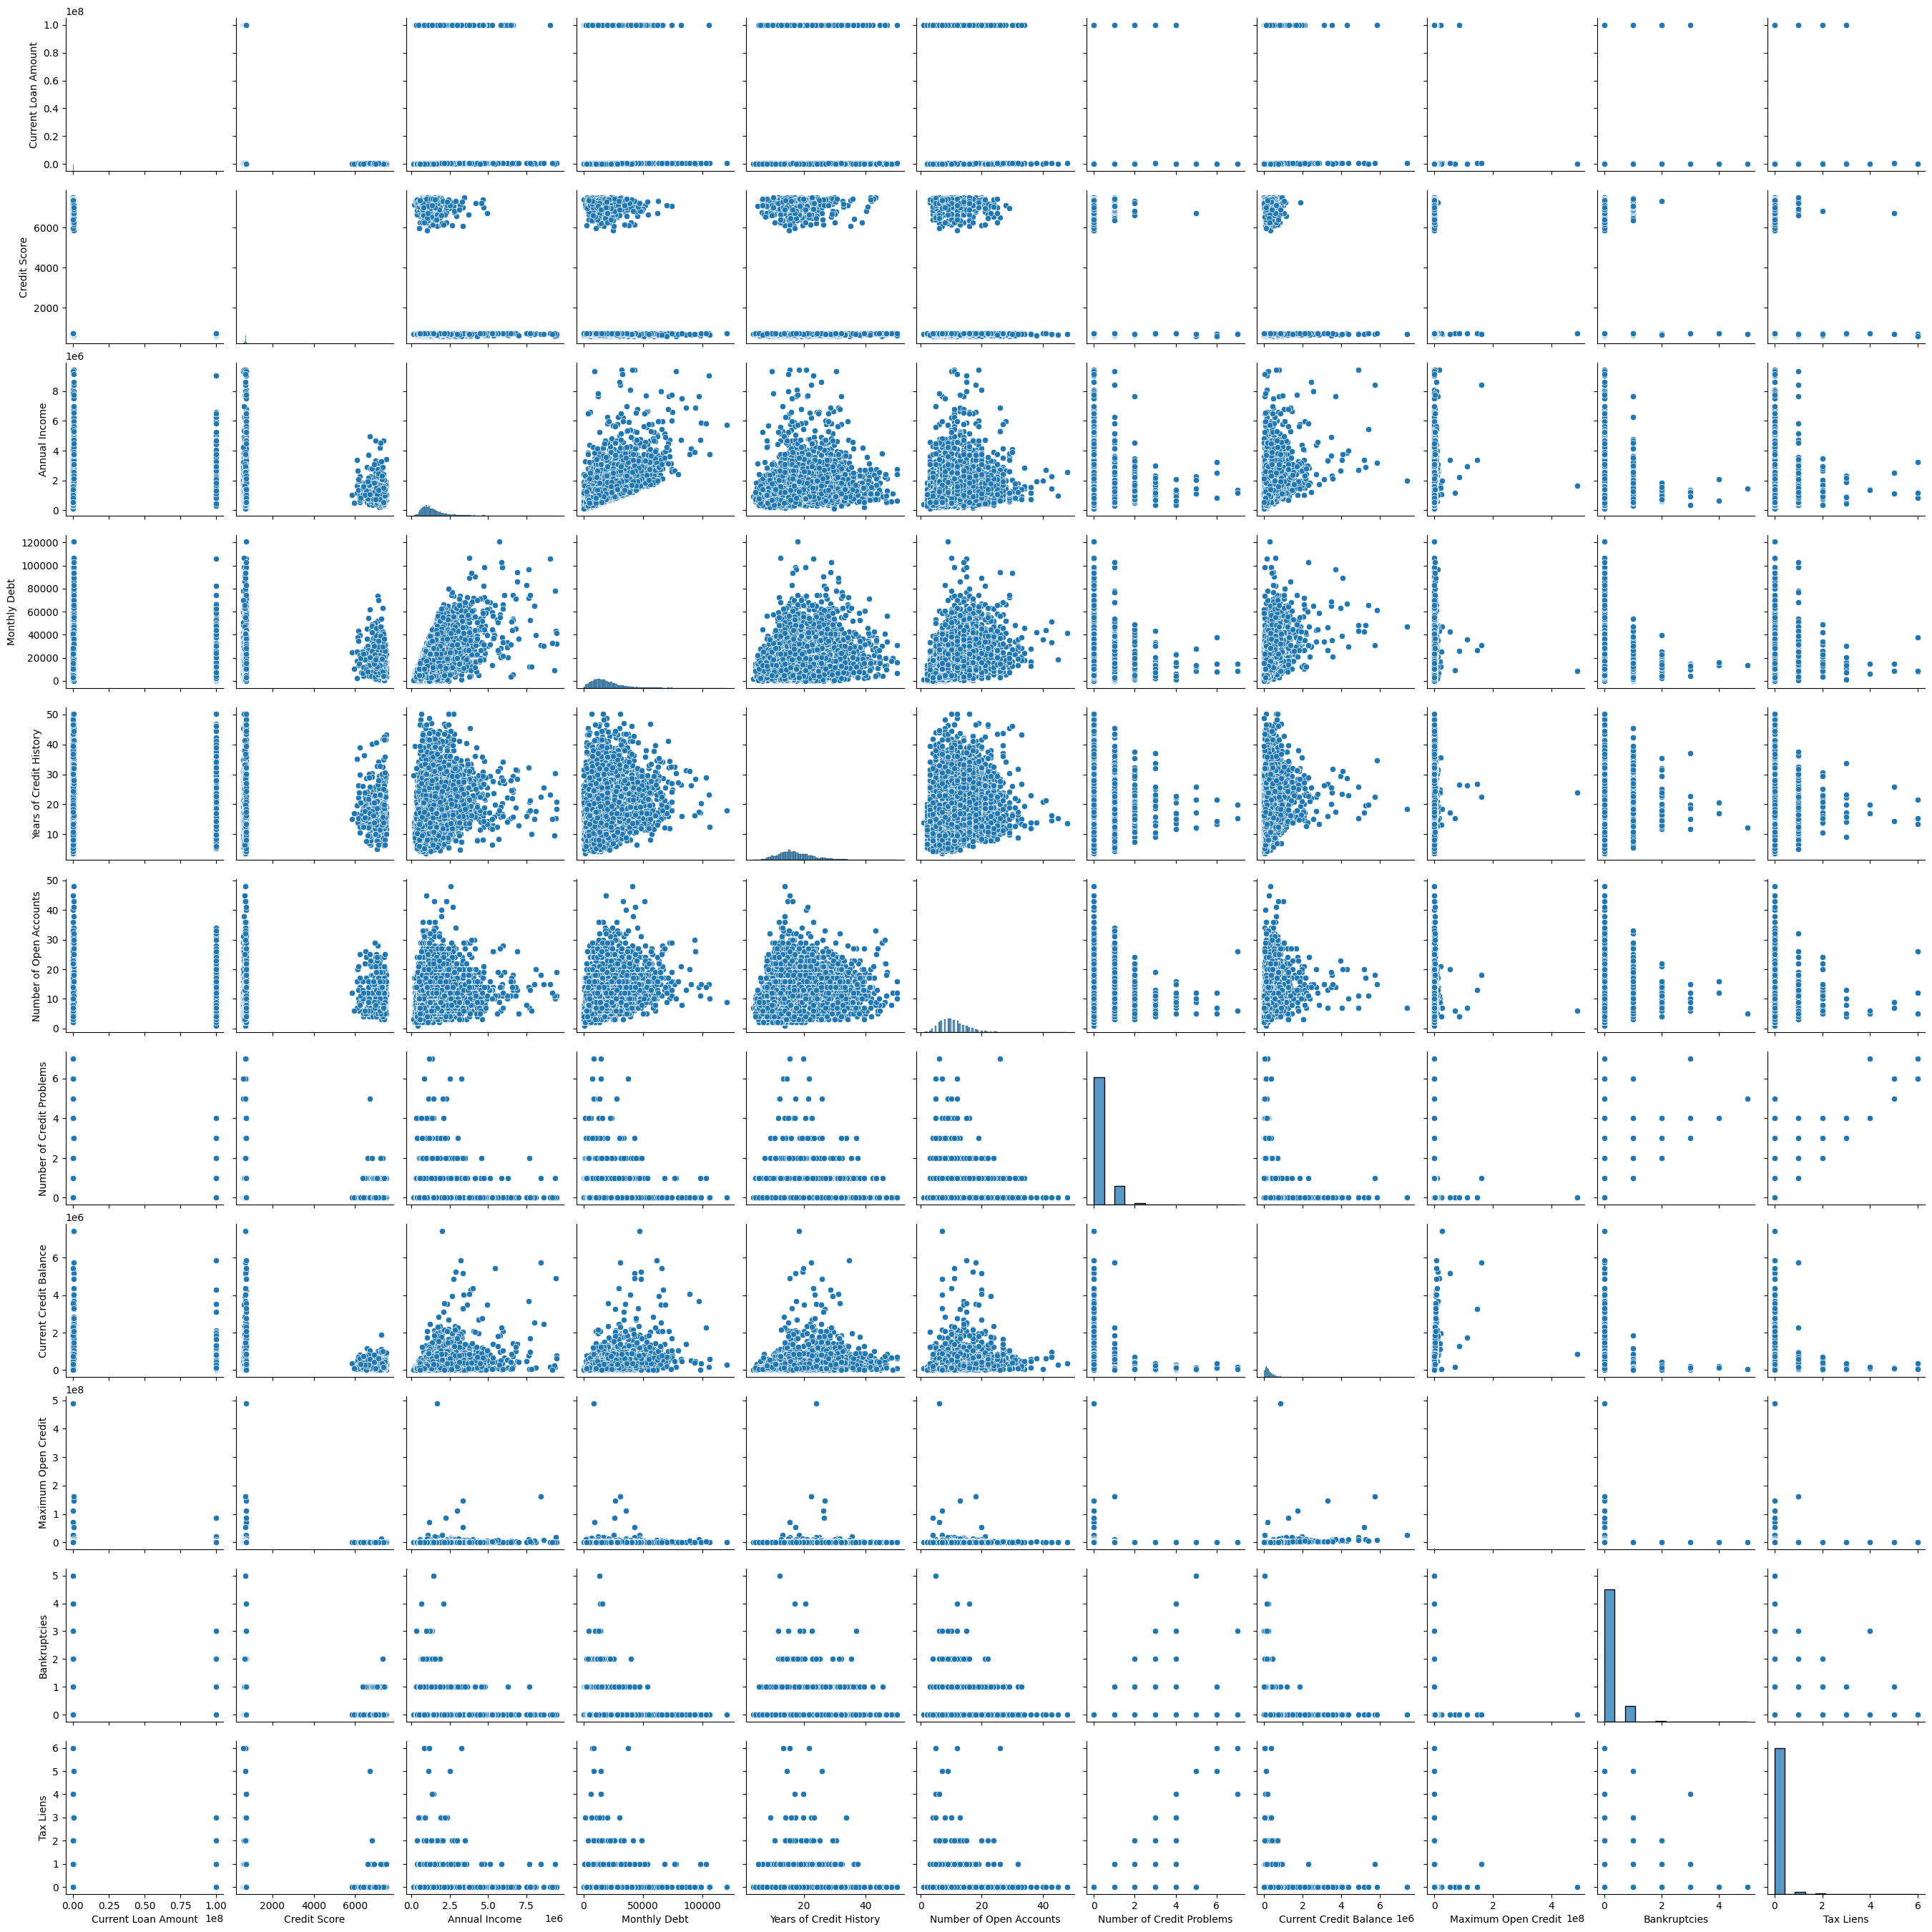

In [33]:
plt.figure(figsize = (20,10))
sns.pairplot(train_data)
plt.show();

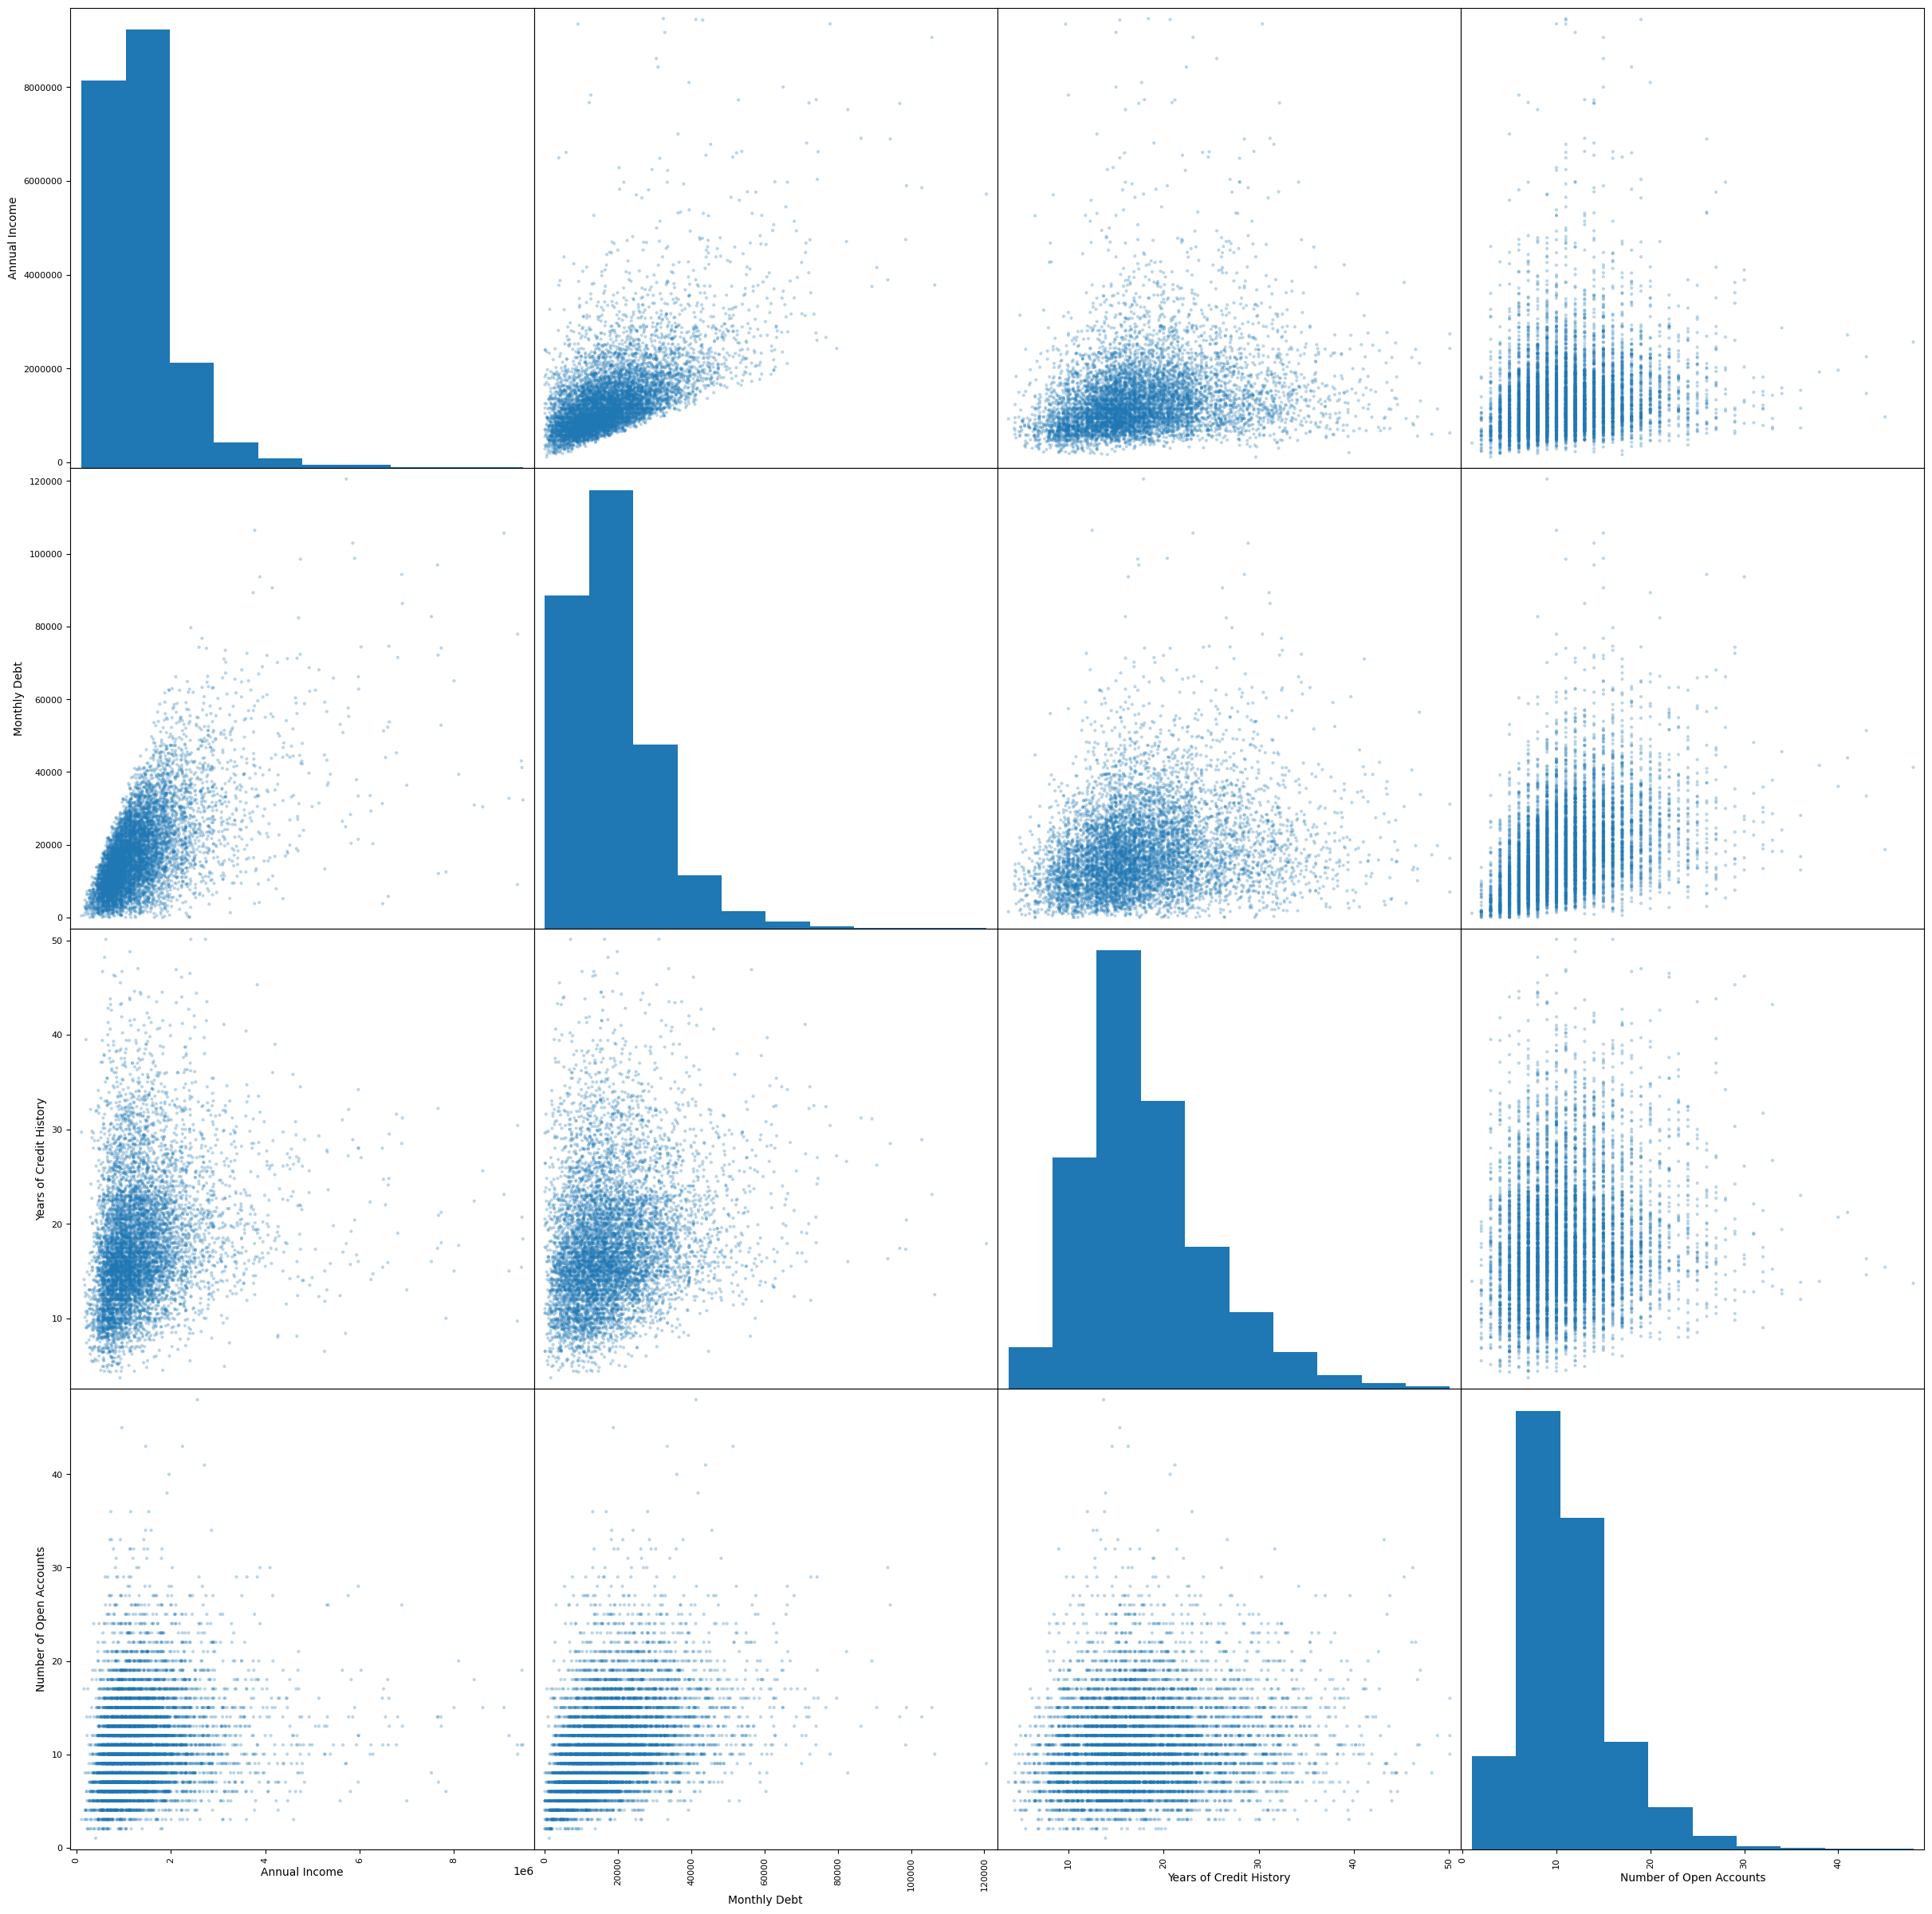

In [34]:
pd.plotting.scatter_matrix(train_data[["Annual Income", "Monthly Debt", "Years of Credit History",
                                       "Number of Open Accounts"]], alpha=0.3, figsize=(30,30))
plt.xticks(rotation = 90)
plt.yticks(rotation = 90)
plt.show();

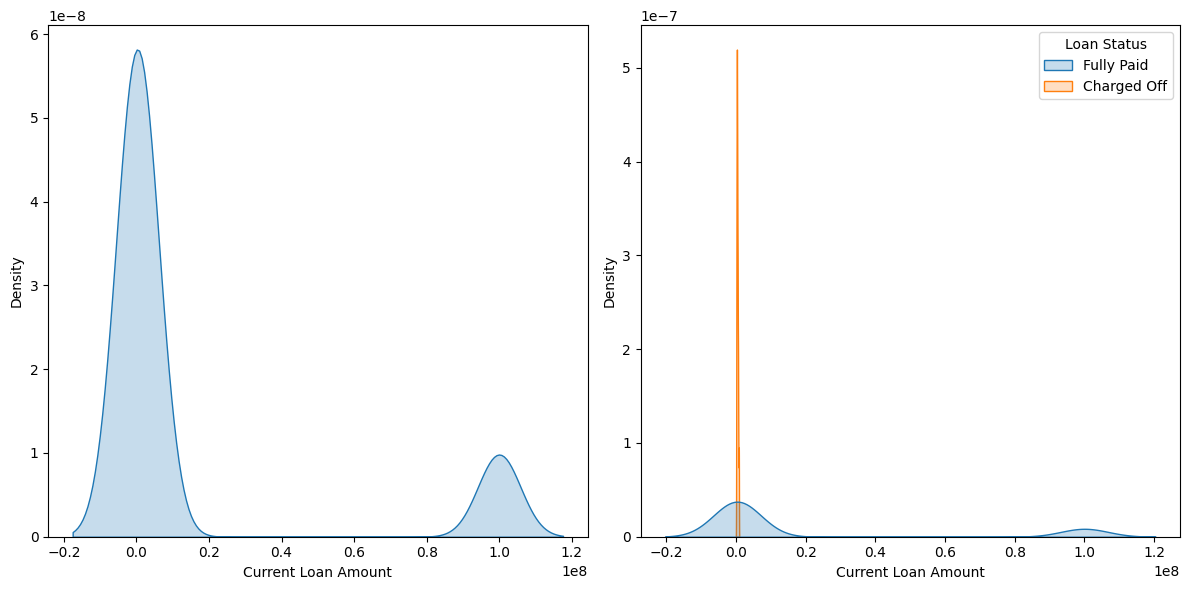

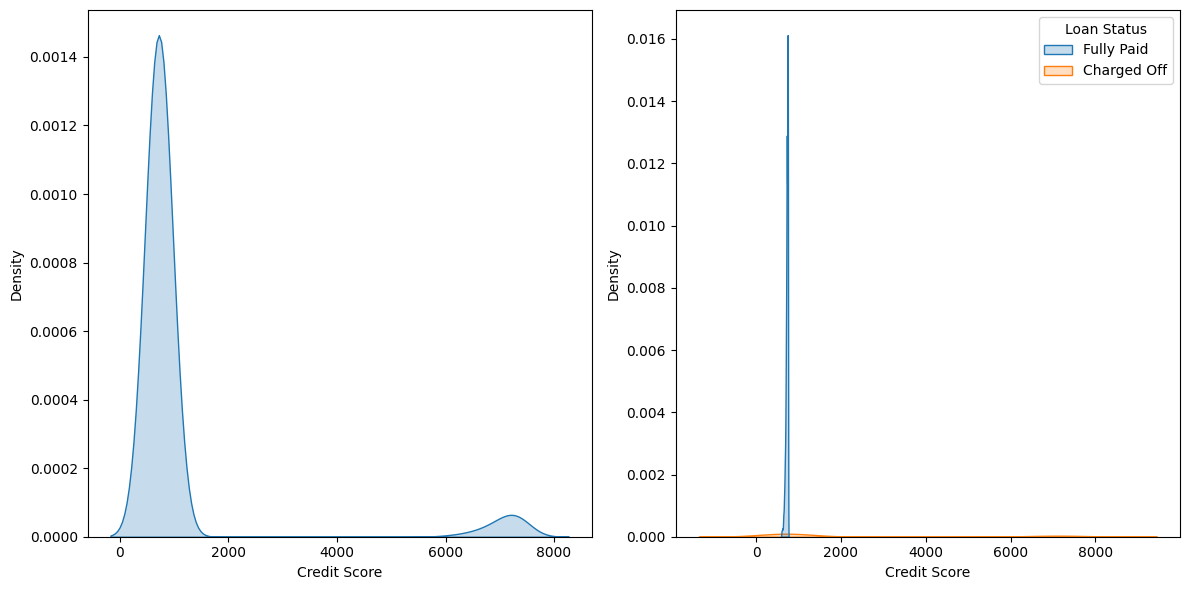

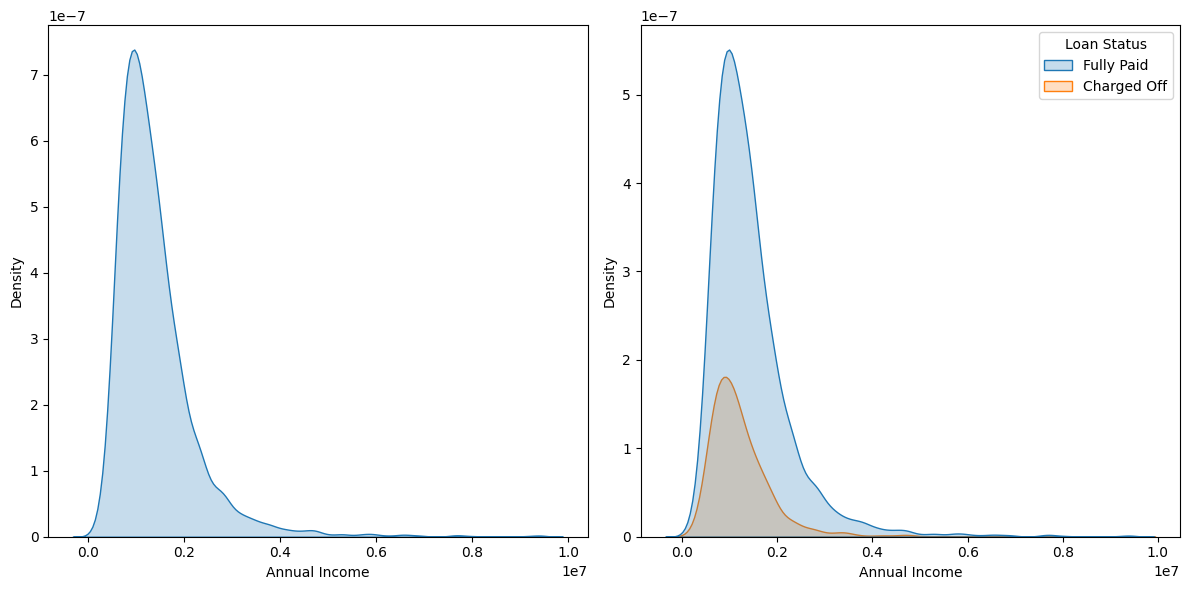

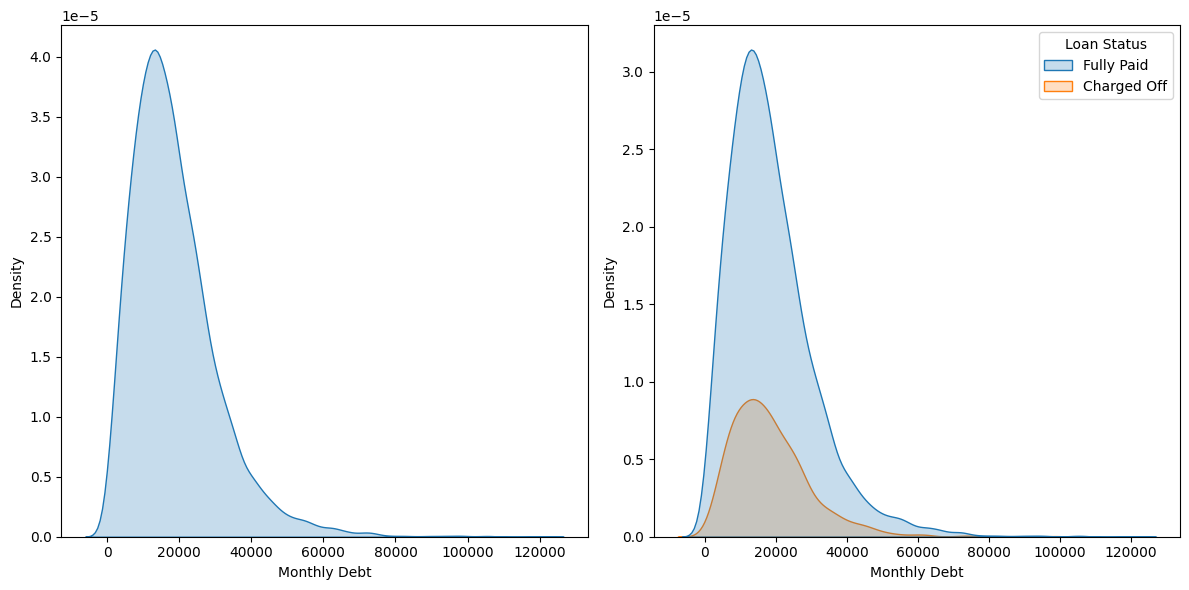

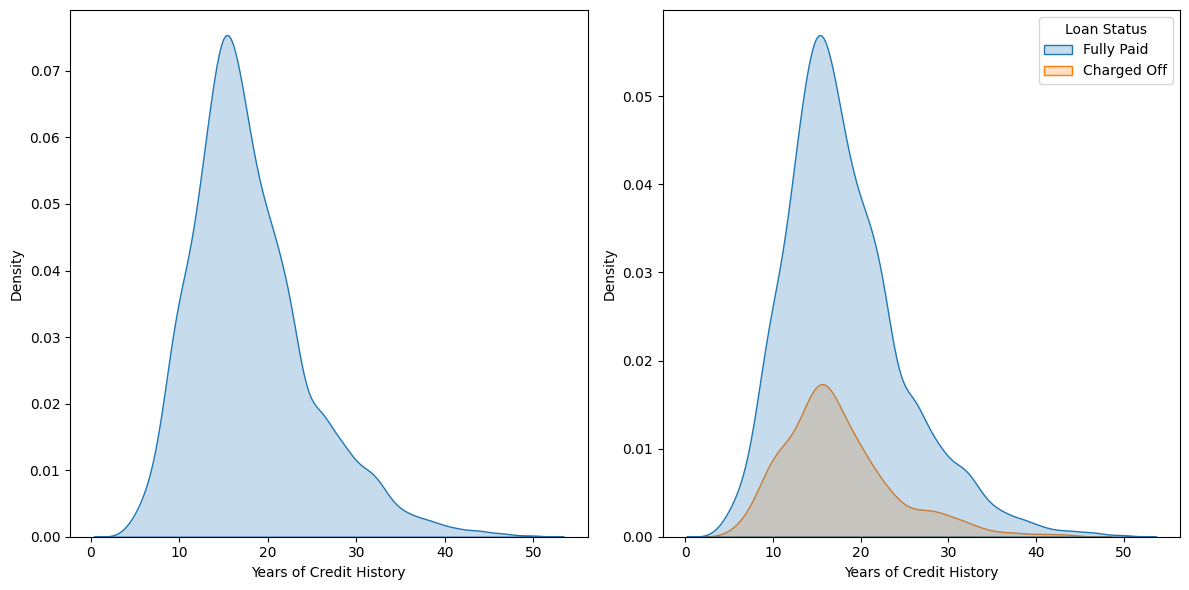

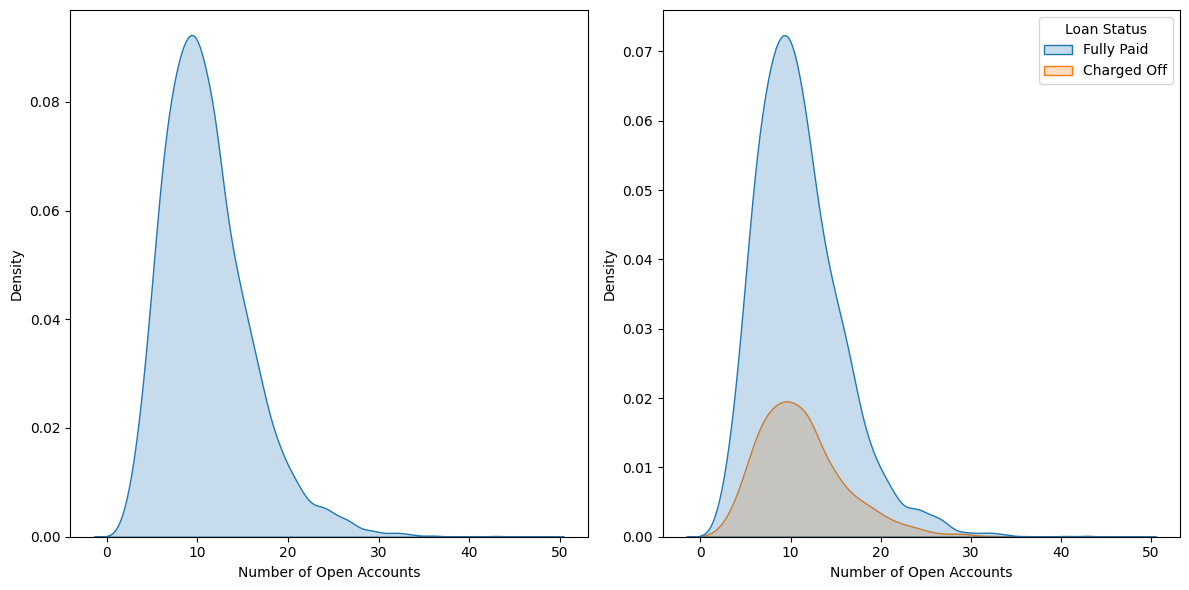

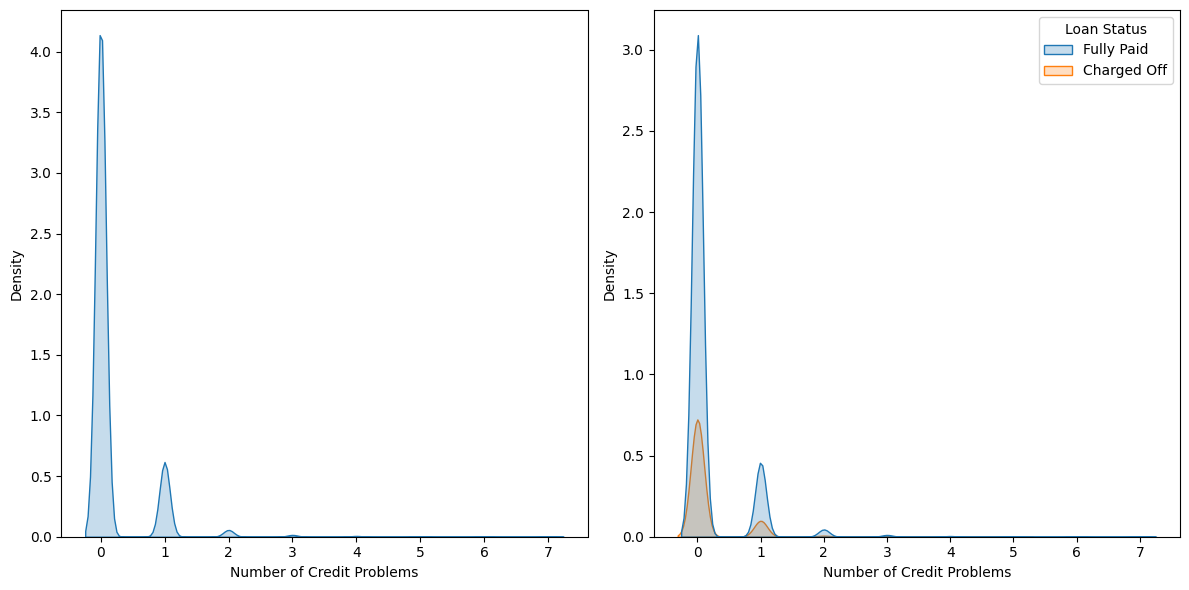

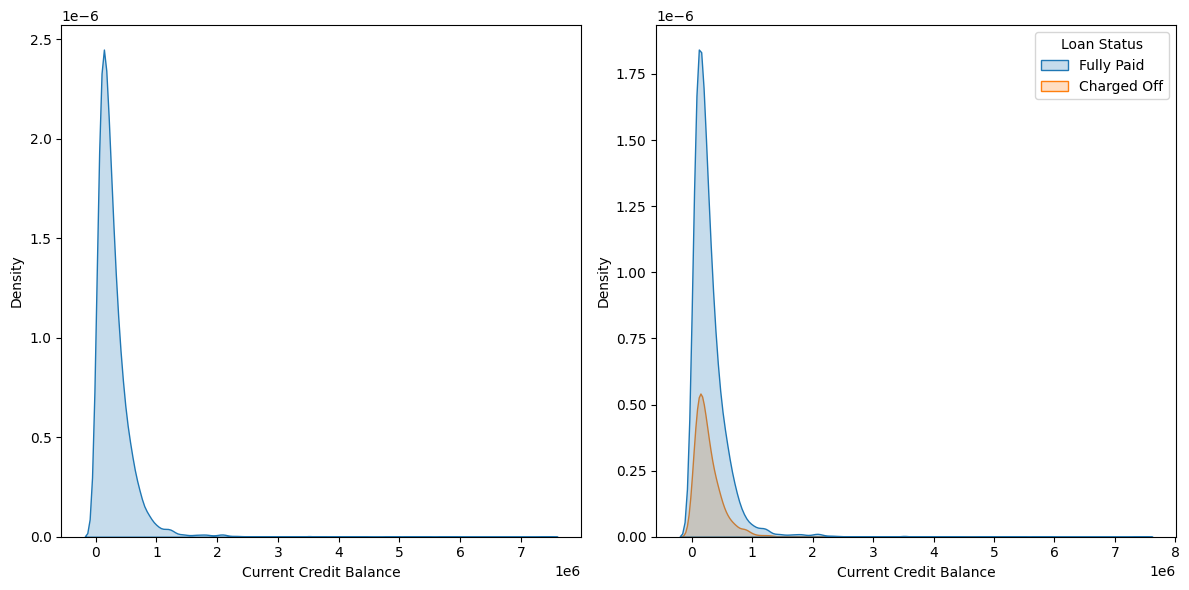

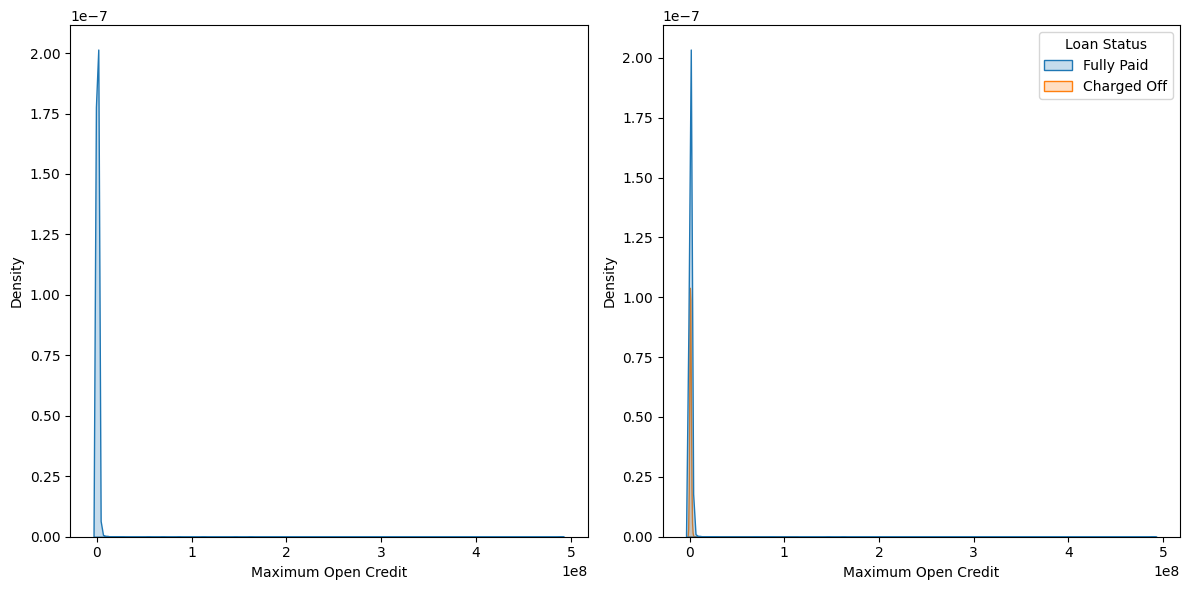

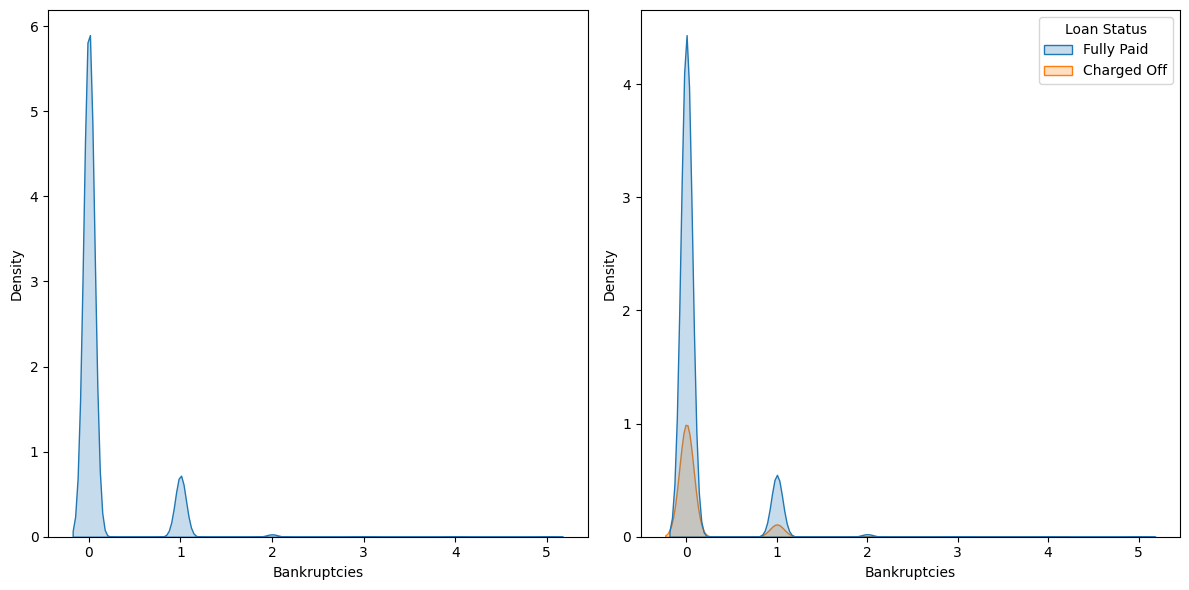

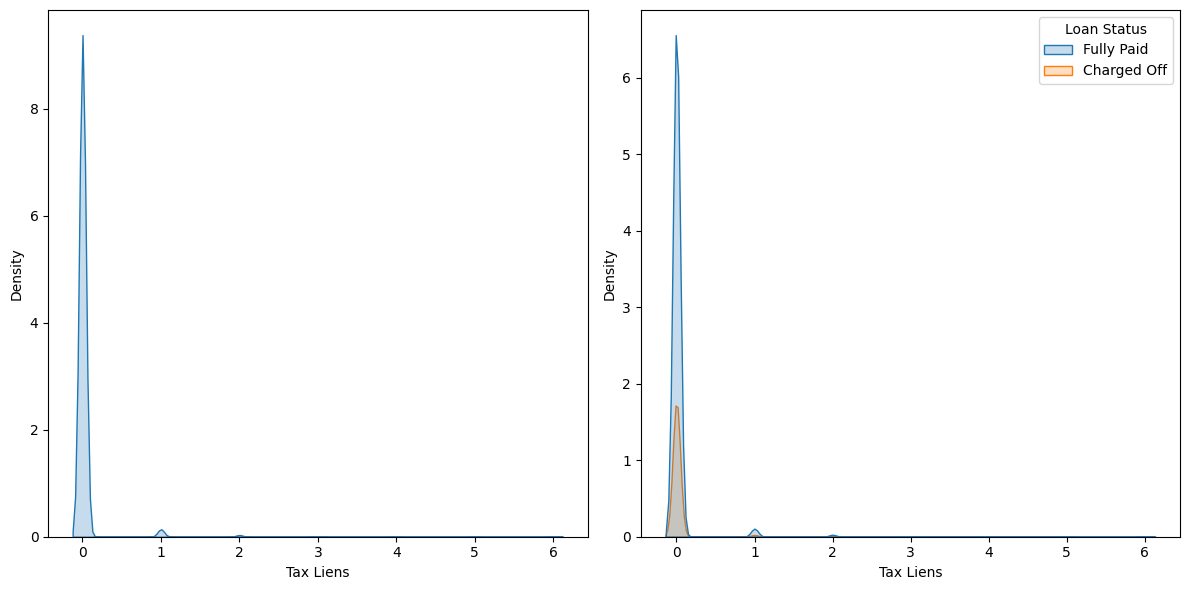

In [35]:
for col in num_columns:
    fig, ax = plt.subplots(1, 2, figsize=(12,6))
    sns.kdeplot(ax = ax[0] ,x=col,data=train_data,fill=True)
    sns.kdeplot(ax = ax[1] ,x=col,data=train_data,hue="Loan Status",fill=True)
    plt.tight_layout()
    plt.show()

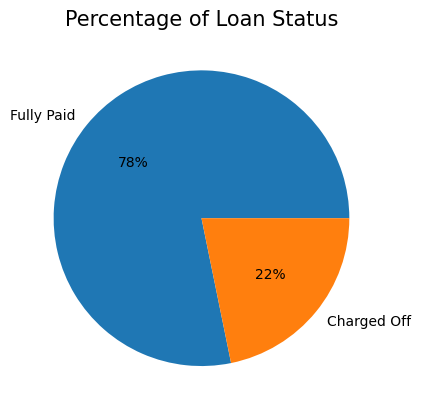

In [36]:
train_data['Loan Status'].value_counts().plot(kind='pie', autopct='%0.0f%%')
plt.title('Percentage of Loan Status', fontsize=15)
plt.ylabel('');

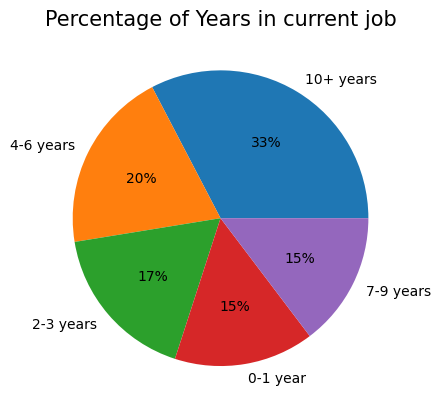

In [37]:
train_data['Years in current job'].value_counts().plot(kind='pie', autopct='%0.0f%%')
plt.title('Percentage of Years in current job', fontsize=15)
plt.ylabel('');

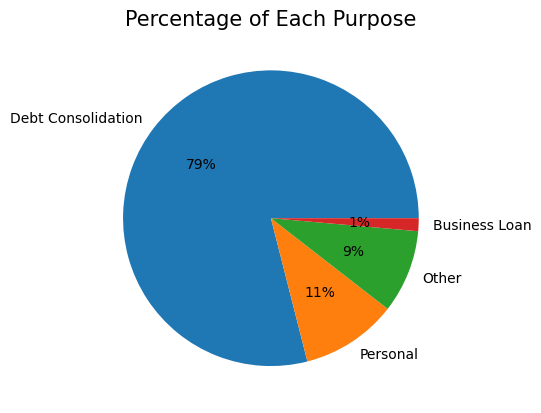

In [38]:
train_data['Purpose'].value_counts().plot(kind='pie', autopct='%0.0f%%')
plt.title('Percentage of Each Purpose', fontsize=15)
plt.ylabel('');

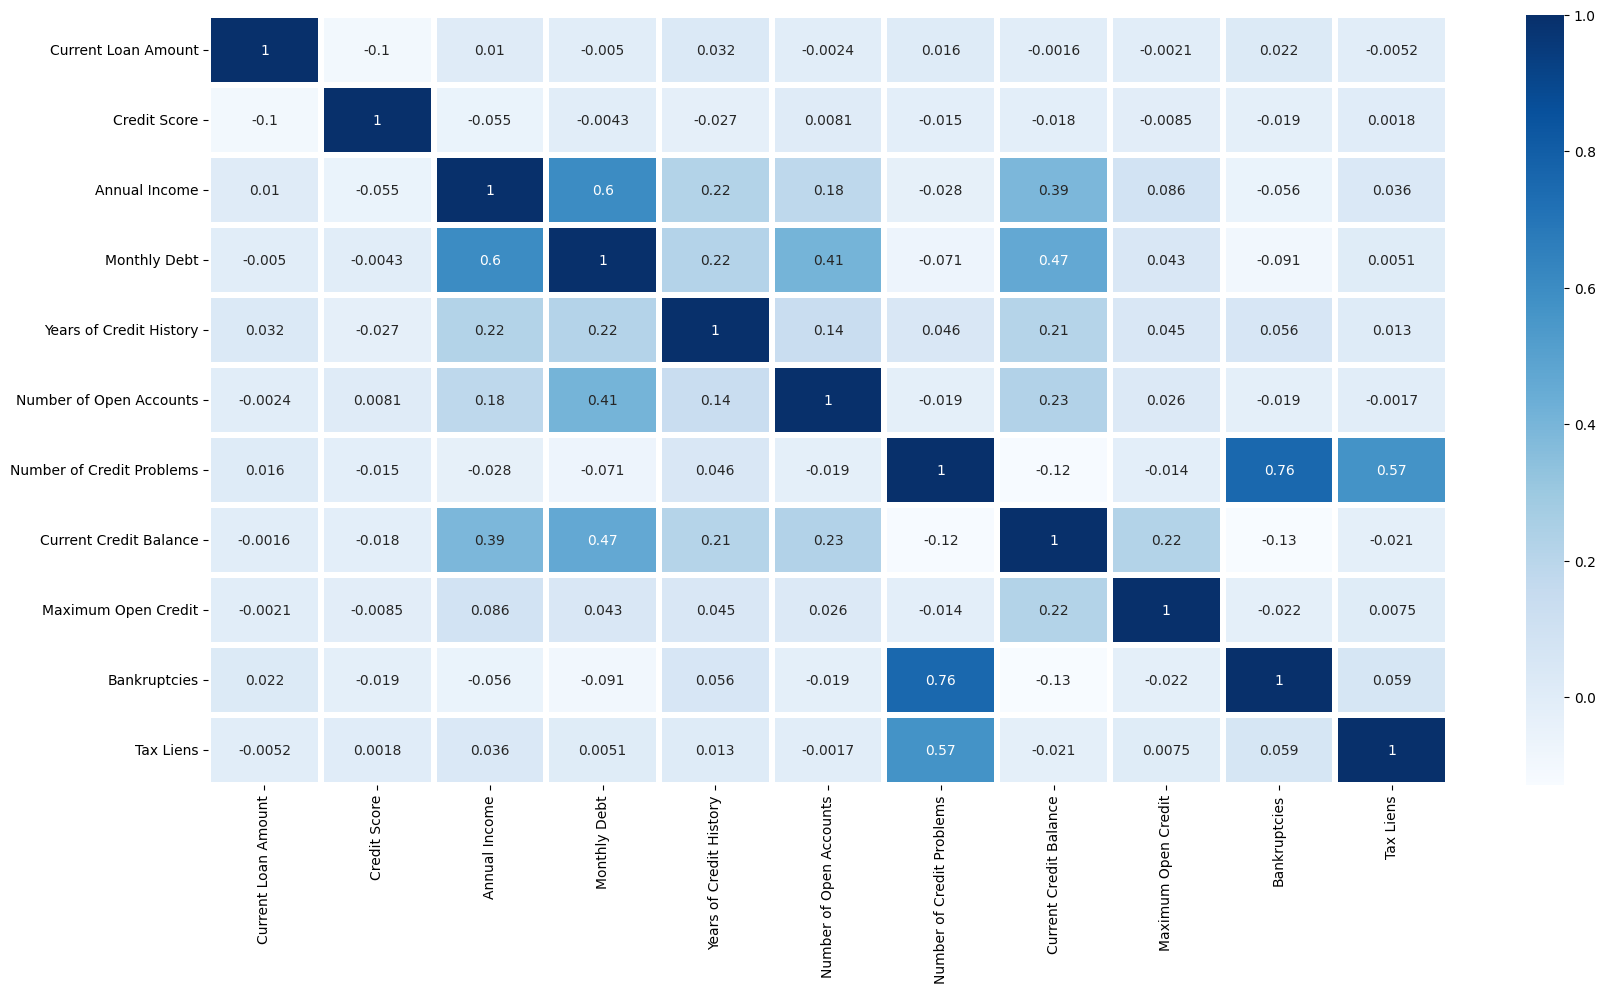

In [39]:
plt.figure(figsize = (20,10))

sns.heatmap(train_data[num_columns].corr(), cmap='Blues' ,linewidths= 3,annot = True)
plt.show()

<a name="5"></a>
# Preprocessing

## Encoding Target Column `Loan Status`

In [40]:
train_data["Loan Status"] = train_data['Loan Status'].replace({"Fully Paid": 1, "Charged Off": 0})

<a name="5.1"></a>
## Preprocessing Categorical Columns

In [41]:
train_data.head()

Loan Status  Current Loan Amount        Term  Credit Score  Annual Income  \
0            1             445412.0  Short Term         709.0      1167493.0   
2            1           99999999.0  Short Term         741.0      2231892.0   
3            1             347666.0   Long Term         721.0       806949.0   
5            0             206602.0  Short Term        7290.0       896857.0   
6            1             217646.0  Short Term         730.0      1184194.0   

  Years in current job Home Ownership             Purpose  Monthly Debt  \
0            7-9 years  Home Mortgage            Personal       5214.74   
2            7-9 years       Own Home  Debt Consolidation      29200.53   
3            2-3 years       Own Home  Debt Consolidation       8741.90   
5            10+ years  Home Mortgage  Debt Consolidation      16367.74   
6             0-1 year  Home Mortgage  Debt Consolidation      10855.08   

   Years of Credit History  Number of Open Accounts  \
0                     17.2                      6.0   
2                     14.9                     18.0   
3                     12.0                      9.0   
5                     17.3                      6.0   
6                     19.6                     13.0   

   Number of Credit Problems  Current Credit Balance  Maximum Open Credit  \
0                        1.0                228190.0             416746.0   
2                        1.0                297996.0             750090.0   
3                        0.0                256329.0             386958.0   
5                        0.0                215308.0             272448.0   
6                        1.0                122170.0             272052.0   

   Bankruptcies  Tax Liens  
0           1.0        0.0  
2           0.0        0.0  
3           0.0        0.0  
5           0.0        0.0  
6           1.0        0.0

In [42]:
from sklearn.preprocessing import LabelEncoder

Term_Encoder = LabelEncoder()
train_data["Term"] = Term_Encoder.fit_transform(train_data["Term"])

In [43]:
JobYears_Encoder = LabelEncoder()
train_data["Years in current job"] = JobYears_Encoder.fit_transform(train_data["Years in current job"])

In [44]:
HomeOwner_Encoder = LabelEncoder()
train_data["Home Ownership"] = HomeOwner_Encoder.fit_transform(train_data["Home Ownership"])

In [45]:
purpose_Encoder = LabelEncoder()
train_data["Purpose"] = purpose_Encoder.fit_transform(train_data["Purpose"])

<a name="5.2"></a>
## Preprocessing Numerical Columns

In [46]:
scaling_columns = ['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt',
                   'Years of Credit History', 'Number of Open Accounts', 'Current Credit Balance',
                   'Maximum Open Credit']

In [47]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
train_data[scaling_columns] = sc.fit_transform(train_data[scaling_columns])

In [48]:
train_data

Loan Status  Current Loan Amount  Term  Credit Score  Annual Income  \
0               1            -0.406883     1     -0.258701      -0.260614   
2               1             2.435851     1     -0.237655       0.969637   
3               1            -0.409674     0     -0.250809      -0.677338   
5               0            -0.413702     1      4.069387      -0.573420   
6               1            -0.413386     1     -0.244890      -0.241311   
...           ...                  ...   ...           ...            ...   
9994            1            -0.418466     1     -0.244890      -0.132936   
9995            0            -0.415501     1     -0.240944      -0.425406   
9997            1            -0.415191     1     -0.231079      -0.646307   
9998            1            -0.412049     1     -0.242917       0.039982   
9999            1            -0.414995     1     -0.236340      -0.972641   

      Years in current job  Home Ownership  Purpose  Monthly Debt  \
0                        4               0        3     -1.110932   
2                        4               1        1      0.874922   
3                        2               1        1     -0.818908   
5                        1               0        1     -0.187542   
6                        0               0        1     -0.643952   
...                    ...             ...      ...           ...   
9994                     3               2        3     -1.313418   
9995                     3               0        2     -0.467847   
9997                     4               0        2     -0.662514   
9998                     2               2        1      0.801476   
9999                     3               1        2     -0.287102   

      Years of Credit History  Number of Open Accounts  \
0                   -0.121208                -1.032022   
2                   -0.464197                 1.399477   
3                   -0.896661                -0.424147   
5                   -0.106296                -1.032022   
6                    0.236693                 0.386353   
...                       ...                      ...   
9994                 0.072655                -1.032022   
9995                -1.478251                 0.588978   
9997                -0.091383                -0.829397   
9998                -1.075612                 2.209977   
9999                 3.189379                -0.829397   

      Number of Credit Problems  Current Credit Balance  Maximum Open Credit  \
0                           1.0               -0.189308            -0.058851   
2                           1.0                0.008327            -0.007469   
3                           0.0               -0.109641            -0.063442   
5                           0.0               -0.225780            -0.081093   
6                           1.0               -0.489474            -0.081154   
...                         ...                     ...                  ...   
9994                        1.0               -0.612983            -0.097220   
9995                        0.0               -0.169082            -0.029959   
9997                        0.0               -0.618793            -0.043259   
9998                        0.0                0.084391             0.068897   
9999                        1.0               -0.803303            -0.072581   

      Bankruptcies  Tax Liens  
0              1.0        0.0  
2              0.0        0.0  
3              0.0        0.0  
5              0.0        0.0  
6              1.0        0.0  
...            ...        ...  
9994           1.0        0.0  
9995           0.0        0.0  
9997           0.0        0.0  
9998           0.0        0.0  
9999           1.0        0.0  

[7613 rows x 16 columns]

<a name="5.3"></a>
## Feature Importance

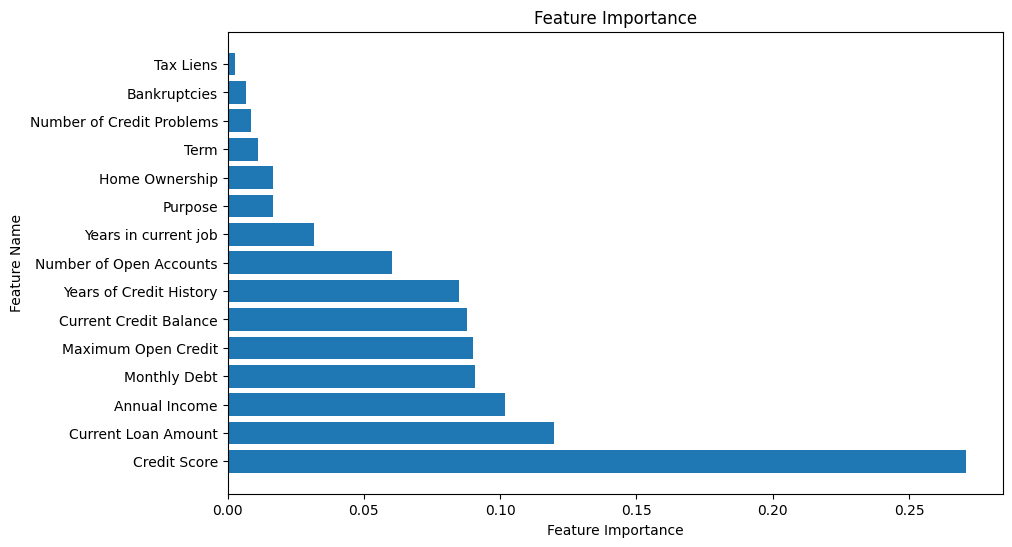

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = train_data.drop(columns=["Loan Status"])
y = train_data["Loan Status"]

# Split your data into training and testing sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

feature_importance = model.feature_importances_

# Create a DataFrame to associate feature names with their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance')
plt.show()

In [50]:
feature_importance_df

Feature  Importance
2                Credit Score    0.270844
0         Current Loan Amount    0.119655
3               Annual Income    0.101700
7                Monthly Debt    0.090884
12        Maximum Open Credit    0.090001
11     Current Credit Balance    0.087932
8     Years of Credit History    0.084781
9     Number of Open Accounts    0.060315
4        Years in current job    0.031760
6                     Purpose    0.016684
5              Home Ownership    0.016531
1                        Term    0.011033
10  Number of Credit Problems    0.008573
13               Bankruptcies    0.006609
14                  Tax Liens    0.002697

<a name="6"></a>
# Modeling

In [51]:
# Classification Models
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.ensemble import (AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier,
                              GradientBoostingClassifier, BaggingClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier


# Metrics
from sklearn.metrics import (mean_squared_error, r2_score, accuracy_score,
                             f1_score, precision_score, recall_score, roc_auc_score, mean_absolute_error)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [52]:
classification_models = [
    LogisticRegression(random_state=42),
    DecisionTreeClassifier(random_state=42),
    ExtraTreeClassifier(random_state=42),
    XGBClassifier(random_state=42),
    XGBRFClassifier(random_state=42),
    AdaBoostClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    ExtraTreesClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    BaggingClassifier(random_state=42),
    SGDClassifier(random_state=42),
    SVC(random_state=42)]

In [53]:
def evaluate_classification_models(X_train, y_train, X_test, y_test, models):
    """
  Evaluates a list of models, stores results, and returns a DataFrame for comparison.

  Args:
      X_train (pd.DataFrame): Training features.
      y_train (pd.Series): Training target variable.
      X_test (pd.DataFrame): Testing features.
      y_test (pd.Series): Testing target variable.
      models (list): A list of scikit-learn model objects.

  Returns:
      pd.DataFrame: A DataFrame containing model names and evaluation metrics.
    """

    model_results = []
    trained_models = {}
    for model in models:
        model.fit(X_train, y_train)
        trained_models[model.__class__.__name__] = model  # Save trained model with name
        start_time = time.time()  # Record start time
        prediction = model.predict(X_test)
        inference_time = time.time() - start_time  # Calculate inference time

        model_results.append({
            "Model-Name": model.__class__.__name__,
            "Accuracy": accuracy_score(y_test, prediction) * 100,
            "ROC_AUC": roc_auc_score(y_test, prediction),
            "F1_Score": f1_score(y_test, prediction),
            "Precision": precision_score(y_test, prediction),
            "Recall": recall_score(y_test, prediction),
            "Inference Time (ms)": inference_time * 1000
        })

    models_df = pd.DataFrame(model_results)
    models_df = models_df.set_index('Model-Name')
    models_df = models_df.sort_values("F1_Score", ascending=False)
    return models_df, trained_models

In [54]:
import time 
from sklearn.metrics import (mean_squared_error, r2_score, accuracy_score,
                             f1_score, precision_score, recall_score, roc_auc_score, mean_absolute_error)

models_df, trained_models = evaluate_classification_models(X_train, y_train, X_valid, y_valid, classification_models)

In [55]:
models_df

Accuracy   ROC_AUC  F1_Score  Precision  \
Model-Name                                                             
RandomForestClassifier      84.832567  0.656296  0.911324   0.837685   
LogisticRegression          84.766907  0.653731  0.911043   0.836620   
XGBRFClassifier             84.766907  0.653731  0.911043   0.836620   
SGDClassifier               84.766907  0.653731  0.911043   0.836620   
SVC                         84.766907  0.653731  0.911043   0.836620   
GradientBoostingClassifier  84.766907  0.654803  0.910975   0.837094   
AdaBoostClassifier          84.569928  0.653540  0.909720   0.836749   
ExtraTreesClassifier        84.504268  0.657406  0.909021   0.838549   
XGBClassifier               84.241628  0.669654  0.906396   0.844477   
BaggingClassifier           80.892974  0.662121  0.882992   0.845266   
ExtraTreeClassifier         75.837163  0.645789  0.845378   0.843960   
DecisionTreeClassifier      75.246225  0.657004  0.839095   0.851082   

                              Recall  Inference Time (ms)  
Model-Name                                                 
RandomForestClassifier      0.999158            36.326647  
LogisticRegression          1.000000             3.987789  
XGBRFClassifier             1.000000             3.957033  
SGDClassifier               1.000000             1.943827  
SVC                         1.000000           181.695938  
GradientBoostingClassifier  0.999158             4.632235  
AdaBoostClassifier          0.996633            21.448135  
ExtraTreesClassifier        0.992424            50.712347  
XGBClassifier               0.978114             4.123688  
BaggingClassifier           0.924242             6.573677  
ExtraTreeClassifier         0.846801             1.814127  
DecisionTreeClassifier      0.827441             1.885176

- **Comments:**
    - The Top-3 Models, `RandomForestClassifier` , `LogisticRegression`, `XGBRFClassifier`, are the same in all metrics but the difference between them is the `inference time`
    - `XGBRFClassifier` and `LogisticRegression` are the best two models

<a name="6.1"></a>
## Models Evaluation

In [56]:
def evaluate_classification_metrics(y_true, y_pred, target_names=None, display=True):
    """
    Evaluates a classification model by generating a confusion matrix, confusion matrix display (optional), and classification report.

    Args:
        y_true (pd.Series): Ground truth labels.
        y_pred (pd.Series): Predicted labels.
        target_names (list, optional): List of class names for improved readability of the confusion matrix. Defaults to None.
        display (bool, optional): Whether to display the confusion matrix visually using ConfusionMatrixDisplay. Defaults to True.

    Returns:
        dict: A dictionary containing the confusion matrix, classification report, and class names (if provided).
    """

    # Ensure y_true and y_pred are NumPy arrays for compatibility with sklearn metrics
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Generate classification report
    report = classification_report(y_true, y_pred, target_names=target_names)

    # Optionally display confusion matrix visually
    if display:
        ConfusionMatrixDisplay(cm, display_labels=target_names).plot()
        plt.show()  # Display the confusion matrix plot

    # Return results in a dictionary for easy access
    evaluation_results = {
        "Confusion Matrix": cm,
        "Classification Report": report,
        "Target Names": target_names,  # Include target names if provided
    }
    return evaluation_results

In [57]:
prediction = trained_models["RandomForestClassifier"].predict(X_valid)

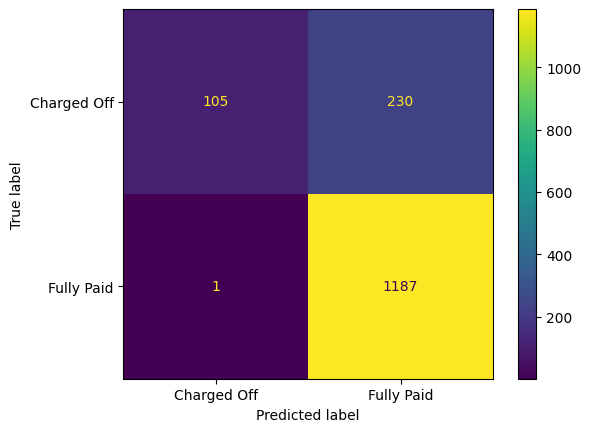

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
target_names = ["Charged Off", "Fully Paid"]
evaluation = evaluate_classification_metrics(y_valid, prediction, target_names)

<a name="7"></a>
# Fine-Tuning

## RandomForest Tuning

In [59]:
rf_param_dist = {
    'n_estimators': range(100, 500, 50),
    'max_depth': range(30, 200, 10),
    'min_samples_split': range(5, 40, 5),
    'min_samples_leaf': range(5, 40, 5),
    'bootstrap': [True, False]
}

In [60]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=trained_models["RandomForestClassifier"],
    param_distributions=rf_param_dist,
    n_iter=40,
    scoring='accuracy', 
    cv=5, 
    verbose=1,
    random_state=42,
)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=40,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': range(30, 200, 10),
                                        'min_samples_leaf': range(5, 40, 5),
                                        'min_samples_split': range(5, 40, 5),
                                        'n_estimators': range(100, 500, 50)},
                   random_state=42, scoring='accuracy', verbose=1)

In [61]:
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Model Score:", best_model.score(X_valid, y_valid))

Best Parameters: {'n_estimators': 400, 'min_samples_split': 30, 'min_samples_leaf': 20, 'max_depth': 40, 'bootstrap': False}
Best Model Score: 0.8476690741956664


In [62]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=400, min_samples_leaf=20, min_samples_split=30, max_depth=40,
                               bootstrap=False)

model.fit(X_train, y_train)

prediction = model.predict(X_valid)

print("F1_score", f1_score(y_valid, prediction))
print("Accuracy", accuracy_score(y_valid, prediction))

F1_score 0.911042944785276
Accuracy 0.8476690741956664


## XGB Tuning

In [63]:
xgb_param_dist = {
    'n_estimators': range(20,250),
    'max_depth': range(30,100)
}

In [64]:
random_search1 = RandomizedSearchCV(
    estimator=trained_models["XGBClassifier"],
    param_distributions=xgb_param_dist,
    n_iter=40, 
    scoring='accuracy',  
    cv=5,  
    verbose=1,
    random_state=42,
)

random_search1.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=42, ...),
                   n_iter=40,
                   param_distributions={'max_depth': range(30, 100),
                                        'n_estimators': range(20, 250)},
                   random_state=42, scoring='accuracy', verbose=1)

In [65]:
best_params = random_search1.best_params_
best_model = random_search1.best_estimator_

print("Best Parameters:", best_params)
print("Best Model Score:", best_model.score(X_valid, y_valid))

Best Parameters: {'n_estimators': 23, 'max_depth': 76}
Best Model Score: 0.8417596848325674


In [66]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=25, max_depth=100)

model.fit(X_train, y_train)

prediction = model.predict(X_valid)

print("F1_score", f1_score(y_valid, prediction))
print("Accuracy", accuracy_score(y_valid, prediction))

F1_score 0.9072486360093531
Accuracy 0.8437294812869337


## XGBRF Tuning

In [67]:
random_search2 = RandomizedSearchCV(
    estimator=trained_models["XGBRFClassifier"],
    param_distributions=xgb_param_dist,
    n_iter=40,  
    scoring='accuracy',  
    cv=5,  
    verbose=1,
    random_state=42,
)

random_search2.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRFClassifier(base_score=None, booster=None,
                                             callbacks=None,
                                             colsample_bylevel=None,
                                             colsample_bytree=None,
                                             early_stopping_rounds=None,
                                             enable_categorical=False,
                                             eval_metric=None,
                                             feature_types=None, gamma=None,
                                             gpu_id=None, grow_policy=None,
                                             importance_type=None,
                                             interaction_constraints=None,
                                             max_bin=None,
                                             max_cat_threshold=No...
                                             max_depth=None, max_leaves=None,
                                             min_child_weight=None, missing=nan,
                                             monotone_constraints=None,
                                             n_estimators=100, n_jobs=None,
                                             num_parallel_tree=None,
                                             objective='binary:logistic',
                                             predictor=None, random_state=42,
                                             reg_alpha=None, ...),
                   n_iter=40,
                   param_distributions={'max_depth': range(30, 100),
                                        'n_estimators': range(20, 250)},
                   random_state=42, scoring='accuracy', verbose=1)

In [68]:
best_params = random_search2.best_params_
best_model = random_search2.best_estimator_

print("Best Parameters:", best_params)
print("Best Model Score:", best_model.score(X_valid, y_valid))

Best Parameters: {'n_estimators': 241, 'max_depth': 51}
Best Model Score: 0.8456992777413


In [69]:
from xgboost import XGBRFClassifier

model = XGBRFClassifier(n_estimators=190, max_depth=33)

model.fit(X_train, y_train)

prediction = model.predict(X_valid)

print("F1_score", f1_score(y_valid, prediction))
print("Accuracy", accuracy_score(y_valid, prediction))

F1_score 0.9125914516750097
Accuracy 0.8509520682862771


## LogisticRegression Tuning

In [70]:
weights = np.linspace(0.01,0.99,100)

In [71]:
lr_param_dist = {
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'multi_class':['auto', 'ovr'],
    'class_weight' : [{0:x, 1:1.0-x} for x in weights]
}

In [72]:
random_search3 = RandomizedSearchCV(
    estimator=trained_models["LogisticRegression"],
    param_distributions=lr_param_dist,
    n_iter=40, 
    scoring='accuracy',  
    cv=5,  
    verbose=1,
    random_state=42,
)

random_search3.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
                   n_iter=40,
                   param_distributions={'class_weight': [{0: 0.01, 1: 0.99},
                                                         {0: 0.0198989898989899,
                                                          1: 0.9801010101010101},
                                                         {0: 0.029797979797979796,
                                                          1: 0.9702020202020202},
                                                         {0: 0.039696969696969696,
                                                          1: 0.9603030303030303},
                                                         {0: 0.049595959595959596,
                                                          1: 0.9504040404040404},
                                                         {0: 0.059494949494949496,
                                                          1: 0.9405050...
                                                          1: 0.7425252525252526},
                                                         {0: 0.2673737373737374,
                                                          1: 0.7326262626262626},
                                                         {0: 0.2772727272727273,
                                                          1: 0.7227272727272727},
                                                         {0: 0.2871717171717172,
                                                          1: 0.7128282828282828},
                                                         {0: 0.29707070707070704,
                                                          1: 0.702929292929293}, ...],
                                        'multi_class': ['auto', 'ovr'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   random_state=42, scoring='accuracy', verbose=1)

In [73]:
best_params = random_search3.best_params_
best_model = random_search3.best_estimator_

print("Best Parameters:", best_params)
print("Best Model Score:", best_model.score(X_valid, y_valid))

Best Parameters: {'solver': 'liblinear', 'multi_class': 'ovr', 'class_weight': {0: 0.6039393939393939, 1: 0.3960606060606061}}
Best Model Score: 0.8476690741956664


In [74]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight = {0:0.6, 1:0.4}, multi_class = "ovr", solver = "liblinear")

model.fit(X_train, y_train)

prediction = model.predict(X_valid)

print("F1_score", f1_score(y_valid, prediction))
print("Accuracy", accuracy_score(y_valid, prediction))

F1_score 0.911042944785276
Accuracy 0.8476690741956664


- **Comments:**
    - There is no big difference between models before and after hypterparameter tuning
    - We can use the previous models directly

<a name="7.1"></a>
## Final Model

In [75]:
from sklearn.ensemble import RandomForestClassifier

final_model = RandomForestClassifier(n_estimators=400, min_samples_leaf=20, min_samples_split=30, max_depth=40,
                               bootstrap=False)

final_model.fit(X, y)

RandomForestClassifier(bootstrap=False, max_depth=40, min_samples_leaf=20,
                       min_samples_split=30, n_estimators=400)

<a name="8"></a>
# Test Data

In [76]:
test_data = pd.read_csv("/kaggle/input/my-dataset/credit_test.csv")
test_data

Loan ID  \
0      f738779f-c726-40dc-92cf-689d73af533d   
1      6dcc0947-164d-476c-a1de-3ae7283dde0a   
2      f7744d01-894b-49c3-8777-fc6431a2cff1   
3      83721ffb-b99a-4a0f-aea5-ef472a138b41   
4      08f3789f-5714-4b10-929d-e1527ab5e5a3   
...                                     ...   
10348                                   NaN   
10349                                   NaN   
10350                                   NaN   
10351                                   NaN   
10352                                   NaN   

                                Customer ID  Current Loan Amount        Term  \
0      ded0b3c3-6bf4-4091-8726-47039f2c1b90             611314.0  Short Term   
1      1630e6e3-34e3-461a-8fda-09297d3140c8             266662.0  Short Term   
2      2c60938b-ad2b-4702-804d-eeca43949c52             153494.0  Short Term   
3      12116614-2f3c-4d16-ad34-d92883718806             176242.0  Short Term   
4      39888105-fd5f-4023-860a-30a3e6f5ccb7             321992.0  Short Term   
...                                     ...                  ...         ...   
10348                                   NaN                  NaN         NaN   
10349                                   NaN                  NaN         NaN   
10350                                   NaN                  NaN         NaN   
10351                                   NaN                  NaN         NaN   
10352                                   NaN                  NaN         NaN   

       Credit Score  Annual Income Years in current job Home Ownership  \
0             747.0      2074116.0            10+ years  Home Mortgage   
1             734.0      1919190.0            10+ years  Home Mortgage   
2             709.0       871112.0              2 years           Rent   
3             727.0       780083.0            10+ years           Rent   
4             744.0      1761148.0            10+ years  Home Mortgage   
...             ...            ...                  ...            ...   
10348           NaN            NaN                  NaN            NaN   
10349           NaN            NaN                  NaN            NaN   
10350           NaN            NaN                  NaN            NaN   
10351           NaN            NaN                  NaN            NaN   
10352           NaN            NaN                  NaN            NaN   

                  Purpose  Monthly Debt  Years of Credit History  \
0      Debt Consolidation      42000.83                     21.8   
1      Debt Consolidation      36624.40                     19.4   
2      Debt Consolidation       8391.73                     12.5   
3      Debt Consolidation      16771.87                     16.5   
4      Debt Consolidation      39478.77                     26.0   
...                   ...           ...                      ...   
10348                 NaN           NaN                      NaN   
10349                 NaN           NaN                      NaN   
10350                 NaN           NaN                      NaN   
10351                 NaN           NaN                      NaN   
10352                 NaN           NaN                      NaN   

       Months since last delinquent  Number of Open Accounts  \
0                               NaN                      9.0   
1                               NaN                     11.0   
2                              10.0                     10.0   
3                              27.0                     16.0   
4                              44.0                     14.0   
...                             ...                      ...   
10348                           NaN                      NaN   
10349                           NaN                      NaN   
10350                           NaN                      NaN   
10351                           NaN                      NaN   
10352                           NaN                      NaN   

       Number of Credit Problems  C

In [77]:
test_data.tail(353)

Loan ID Customer ID  Current Loan Amount Term  Credit Score  \
10000     NaN         NaN                  NaN  NaN           NaN   
10001     NaN         NaN                  NaN  NaN           NaN   
10002     NaN         NaN                  NaN  NaN           NaN   
10003     NaN         NaN                  NaN  NaN           NaN   
10004     NaN         NaN                  NaN  NaN           NaN   
...       ...         ...                  ...  ...           ...   
10348     NaN         NaN                  NaN  NaN           NaN   
10349     NaN         NaN                  NaN  NaN           NaN   
10350     NaN         NaN                  NaN  NaN           NaN   
10351     NaN         NaN                  NaN  NaN           NaN   
10352     NaN         NaN                  NaN  NaN           NaN   

       Annual Income Years in current job Home Ownership Purpose  \
10000            NaN                  NaN            NaN     NaN   
10001            NaN                  NaN            NaN     NaN   
10002            NaN                  NaN            NaN     NaN   
10003            NaN                  NaN            NaN     NaN   
10004            NaN                  NaN            NaN     NaN   
...              ...                  ...            ...     ...   
10348            NaN                  NaN            NaN     NaN   
10349            NaN                  NaN            NaN     NaN   
10350            NaN                  NaN            NaN     NaN   
10351            NaN                  NaN            NaN     NaN   
10352            NaN                  NaN            NaN     NaN   

       Monthly Debt  Years of Credit History  Months since last delinquent  \
10000           NaN                      NaN                           NaN   
10001           NaN                      NaN                           NaN   
10002           NaN                      NaN                           NaN   
10003           NaN                      NaN                           NaN   
10004           NaN                      NaN                           NaN   
...             ...                      ...                           ...   
10348           NaN                      NaN                           NaN   
10349           NaN                      NaN                           NaN   
10350           NaN                      NaN                           NaN   
10351           NaN                      NaN                           NaN   
10352           NaN                      NaN                           NaN   

       Number of Open Accounts  Number of Credit Problems  \
10000                      NaN                        NaN   
10001                      NaN                        NaN   
10002                      NaN                        NaN   
10003                      NaN                        NaN   
10004                      NaN                        NaN   
...                        ...                        ...   
10348                      NaN                        NaN   
10349                      NaN                        NaN   
10350                      NaN                        NaN   
10351                      NaN                        NaN   
10352                      NaN                        NaN   

       Current Credit Balance  Maximum Open Credit  Bankruptcies  Tax Liens  
10000                     NaN                  NaN           NaN        NaN  
10001                     NaN                  NaN           NaN        NaN  
10002                     NaN                  NaN           NaN        NaN  
10003                     NaN                  NaN           NaN        NaN  
10004                     NaN                  NaN           NaN        NaN  
...                       ...                  ...           ...        ...  
10348                     NaN                  NaN           NaN        NaN  
10349                     NaN                  NaN           NaN  

In [78]:
test_data = test_data.iloc[:10000]
test_data

Loan ID  \
0     f738779f-c726-40dc-92cf-689d73af533d   
1     6dcc0947-164d-476c-a1de-3ae7283dde0a   
2     f7744d01-894b-49c3-8777-fc6431a2cff1   
3     83721ffb-b99a-4a0f-aea5-ef472a138b41   
4     08f3789f-5714-4b10-929d-e1527ab5e5a3   
...                                    ...   
9995  c4ab66f9-833c-43b8-879c-4f8bcb64dd14   
9996  bbd3a392-01b4-4e0e-9c28-b2a4a39beac7   
9997  da9870de-4280-46a3-8fc6-91cfe5bfde9d   
9998  0cc8e0e0-1bc6-49d7-ad0f-0598b647458f   
9999  14f94b64-26c4-48fd-b916-1388d7adcc1d   

                               Customer ID  Current Loan Amount        Term  \
0     ded0b3c3-6bf4-4091-8726-47039f2c1b90             611314.0  Short Term   
1     1630e6e3-34e3-461a-8fda-09297d3140c8             266662.0  Short Term   
2     2c60938b-ad2b-4702-804d-eeca43949c52             153494.0  Short Term   
3     12116614-2f3c-4d16-ad34-d92883718806             176242.0  Short Term   
4     39888105-fd5f-4023-860a-30a3e6f5ccb7             321992.0  Short Term   
...                                    ...                  ...         ...   
9995  8ee2002b-8fb6-4af0-ab74-25a1c23e7647             157806.0  Short Term   
9996  6c306306-f5c2-4db5-b74a-af2895123ecb             132550.0  Short Term   
9997  cc94e25e-1060-4465-b603-194e122f0239             223212.0   Long Term   
9998  f90cf410-a34b-49e7-8af9-2b405e17b827           99999999.0  Short Term   
9999  f1838fa9-7ad9-44d5-97a6-7a6d3f3529d7           99999999.0  Short Term   

      Credit Score  Annual Income Years in current job Home Ownership  \
0            747.0      2074116.0            10+ years  Home Mortgage   
1            734.0      1919190.0            10+ years  Home Mortgage   
2            709.0       871112.0              2 years           Rent   
3            727.0       780083.0            10+ years           Rent   
4            744.0      1761148.0            10+ years  Home Mortgage   
...            ...            ...                  ...            ...   
9995         731.0      1514376.0              6 years           Rent   
9996         718.0       763192.0              4 years  Home Mortgage   
9997           NaN            NaN                  NaN           Rent   
9998         721.0       972097.0            10+ years  Home Mortgage   
9999         748.0      1079960.0              6 years  Home Mortgage   

                 Purpose  Monthly Debt  Years of Credit History  \
0     Debt Consolidation      42000.83                     21.8   
1     Debt Consolidation      36624.40                     19.4   
2     Debt Consolidation       8391.73                     12.5   
3     Debt Consolidation      16771.87                     16.5   
4     Debt Consolidation      39478.77                     26.0   
...                  ...           ...                      ...   
9995  Debt Consolidation       4795.41                     12.5   
9996  Debt Consolidation      12401.87                      9.9   
9997  Debt Consolidation       4354.42                     27.2   
9998  Debt Consolidation      12232.20                     16.8   
9999  Debt Consolidation      12239.61                     19.7   

      Months since last delinquent  Number of Open Accounts  \
0                              NaN                      9.0   
1                              NaN                     11.0   
2                             10.0                     10.0   
3                             27.0                     16.0   
4                             44.0                     14.0   
...                            ...                      ...   
9995                           NaN                      9.0   
9996                          20.0                      8.0   
9997                           NaN                      8.0   
9998                          24.0                      8.0   
9999                           NaN                     14.0   

      Number of Credit Problems  Current Credit Balance  Maximum Open Credit  \
0             

In [79]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       10000 non-null  object 
 1   Customer ID                   10000 non-null  object 
 2   Current Loan Amount           10000 non-null  float64
 3   Term                          10000 non-null  object 
 4   Credit Score                  8019 non-null   float64
 5   Annual Income                 8019 non-null   float64
 6   Years in current job          9573 non-null   object 
 7   Home Ownership                10000 non-null  object 
 8   Purpose                       10000 non-null  object 
 9   Monthly Debt                  10000 non-null  float64
 10  Years of Credit History       10000 non-null  float64
 11  Months since last delinquent  4694 non-null   float64
 12  Number of Open Accounts       10000 non-null  float64
 13  Nu

In [80]:
test_data = test_data.drop(columns=["Loan ID", "Customer ID"])

In [81]:
test_data["Purpose"] = test_data["Purpose"].replace({"other":"Other", "moving":"Personal",
                                                       "Educational Expenses":"Personal", "wedding":"Personal",
                                                       "Medical Bills":"Personal", "Buy a Car":"Personal",
                                                       "Buy House":"Personal", "Home Improvements":"Personal",
                                                       "Take a Trip": "Personal","vacation":"Personal",
                                                       "major_purchase":"Personal", "small_business":"Personal"
                                                        , "renewable_energy":"Other"})

In [82]:
test_data["Home Ownership"] = test_data["Home Ownership"].replace({"HaveMortgage":"Home Mortgage"})

In [83]:
test_data["Years in current job"] = test_data["Years in current job"].replace({"7 years":"7-9 years",
                                                                                 "8 years":"7-9 years",
                                                                                 "9 years":"7-9 years",
                                                                                 "4 years":"4-6 years",
                                                                                 "5 years":"4-6 years",
                                                                                 "6 years":"4-6 years",
                                                                                 "< 1 year":"0-1 year",
                                                                                 "1 year":"0-1 year",
                                                                                 "2 years":"2-3 years",
                                                                                 "3 years":"2-3 years"})

In [84]:
test_data = test_data.drop(columns=["Months since last delinquent"])

In [85]:
test_data = test_data.dropna(subset=["Bankruptcies", "Years in current job", "Credit Score", "Annual Income"])

In [86]:
test_data.duplicated().sum()

0

In [87]:
test_data["Purpose"] = purpose_Encoder.transform(test_data["Purpose"])
test_data["Home Ownership"] = HomeOwner_Encoder.transform(test_data["Home Ownership"])
test_data["Years in current job"] = JobYears_Encoder.transform(test_data["Years in current job"])
test_data["Term"] = Term_Encoder.transform(test_data["Term"])

In [88]:
test_data[scaling_columns] = sc.transform(test_data[scaling_columns])

In [89]:
test_data

Current Loan Amount  Term  Credit Score  Annual Income  \
0               -0.402145     1     -0.233709       0.787277   
1               -0.411987     1     -0.242259       0.608211   
2               -0.415218     1     -0.258701      -0.603177   
3               -0.414569     1     -0.246863      -0.708390   
4               -0.410407     1     -0.235682       0.425543   
...                   ...   ...           ...            ...   
9994            -0.406963     1     -0.238971       0.157185   
9995            -0.415095     1     -0.244232       0.140319   
9996            -0.415816     1     -0.252782      -0.727913   
9998             2.435851     1     -0.250809      -0.486457   
9999             2.435851     1     -0.233052      -0.361787   

      Years in current job  Home Ownership  Purpose  Monthly Debt  \
0                        1               0        1      1.934697   
1                        1               0        1      1.489567   
2                        2               2        1     -0.847900   
3                        1               2        1     -0.154083   
4                        1               0        1      1.725888   
...                    ...             ...      ...           ...   
9994                     4               0        1      0.071321   
9995                     3               2        1     -1.145650   
9996                     3               0        1     -0.515889   
9998                     1               0        1     -0.529936   
9999                     3               0        1     -0.529323   

      Years of Credit History  Number of Open Accounts  \
0                    0.564769                -0.424147   
1                    0.206868                -0.018897   
2                   -0.822099                -0.221522   
3                   -0.225596                 0.994227   
4                    1.191097                 0.588978   
...                       ...                      ...   
9994                -0.195771                -0.018897   
9995                -0.822099                -0.424147   
9996                -1.209825                -0.626772   
9998                -0.180859                -0.626772   
9999                 0.251606                 0.588978   

      Number of Credit Problems  Current Credit Balance  Maximum Open Credit  \
0                           0.0                0.925392             0.040141   
1                           0.0                1.088654             0.016322   
2                           0.0               -0.726271            -0.063276   
3                           1.0               -0.391033            -0.041190   
4                           0.0                0.183209            -0.050939   
...                         ...                     ...                  ...   
9994                        0.0                0.351581            -0.021837   
9995                        0.0               -0.588884            -0.086956   
9996                        0.0               -0.624979            -0.072269   
9998                        1.0               -0.311634            -0.085993   
9999                        0.0               -0.328525            -0.029389   

      Bankruptcies  Tax Liens  
0              0.0        0.0  
1              0.0        0.0  
2              0.0        0.0  
3              1.0        0.0  
4              0.0        0.0  
...            ...        ...  
9994           0.0        0.0  
9995           0.0        0.0  
9996           0.0        0.0  
9998           0.0        0.0  
9999           0.0        0.0  

[7658 rows x 15 columns]

In [90]:
y_pred = final_model.predict(test_data)

In [91]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

# The End